In [2]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [3]:
#| echo: false
from IPython.display import display
pd.options.display.notebook_repr_html = False

In [4]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

![](images/process.png){width=500 fig-align="center"} <br />
source: [R for Data Science](https://r4ds.had.co.nz/explore-intro.html)

Visualising, transforming, modelling을 통해 **질문들을 개선하거나 새로운 질문들을 생성**하면서 데이터에 대한 이해를 늘리면서 질문들에 답을 구하는 반복순환 과정

크게 다음 2가지 타입의 질문을 기본으로 시작

1. 각 변수들 내에 **변동성 (variation)**은 어떠한가?
2. 두 변수들간에 **공변성 (covariation)**은 어떠한가?

In [5]:
# import a dataset
diamonds_data = sm.datasets.get_rdataset("diamonds", "ggplot2")
diamonds = diamonds_data.data

In [35]:
#| output: false
print(diamonds_data.__doc__)

.. container::

   ======== ===============
   diamonds R Documentation
   ======== ===============

   .. rubric:: Prices of over 50,000 round cut diamonds
      :name: prices-of-over-50000-round-cut-diamonds

   .. rubric:: Description
      :name: description

   A dataset containing the prices and other attributes of almost 54,000
   diamonds. The variables are as follows:

   .. rubric:: Usage
      :name: usage

   ::

      diamonds

   .. rubric:: Format
      :name: format

   A data frame with 53940 rows and 10 variables:

   price
      price in US dollars ($326–$18,823)

   carat
      weight of the diamond (0.2–5.01)

   cut
      quality of the cut (Fair, Good, Very Good, Premium, Ideal)

   color
      diamond colour, from D (best) to J (worst)

   clarity
      a measurement of how clear the diamond is (I1 (worst), SI2, SI1,
      VS2, VS1, VVS2, VVS1, IF (best))

   x
      length in mm (0–10.74)

   y
      width in mm (0–58.9)

   z
      depth in mm (0–31.8)

   dep

In [5]:
diamonds

       carat        cut color clarity  depth  table  price    x    y    z
0       0.23      Ideal     E     SI2  61.50  55.00    326 3.95 3.98 2.43
1       0.21    Premium     E     SI1  59.80  61.00    326 3.89 3.84 2.31
2       0.23       Good     E     VS1  56.90  65.00    327 4.05 4.07 2.31
...      ...        ...   ...     ...    ...    ...    ...  ...  ...  ...
53937   0.70  Very Good     D     SI1  62.80  60.00   2757 5.66 5.68 3.56
53938   0.86    Premium     H     SI2  61.00  58.00   2757 6.15 6.12 3.74
53939   0.75      Ideal     D     SI2  62.20  55.00   2757 5.83 5.87 3.64

[53940 rows x 10 columns]

In [7]:
# cut, color, clarity 모두 categorical type으로 변형
diamonds["cut"] = pd.Categorical(
    diamonds["cut"], 
    categories=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    ordered=True
)
diamonds["color"] = pd.Categorical(
    diamonds["color"], 
    categories=["D", "E", "F", "G", "H", "I", "J"],
    ordered=True
)
diamonds["clarity"] = pd.Categorical(
    diamonds["clarity"], 
    categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
    ordered=True
)

# Variation (변동성, 분산도)

variability, variance..

- 대상들을 측정함 따라 값이 변화하는 경향성
    - 사람들의 키, 눈의 색깔 등
- 변수는 고유한 변동성의 패턴을 지니고, 흥미로운 정보를 지닐 수 있음.
- 이를 살펴보는 최선의 방식은 분포를 살펴보는 것임
- 호기심에 따라 다양한 질문이나 의심을 품게 되면서 탐색을 진행.

먼저 diamonds 데이터에서 54,000개 정도되는 다이아몬드의 무게(캐럿, `carat`)의 분포를 다이어그램으로 살펴보는 것으로 시작하면,

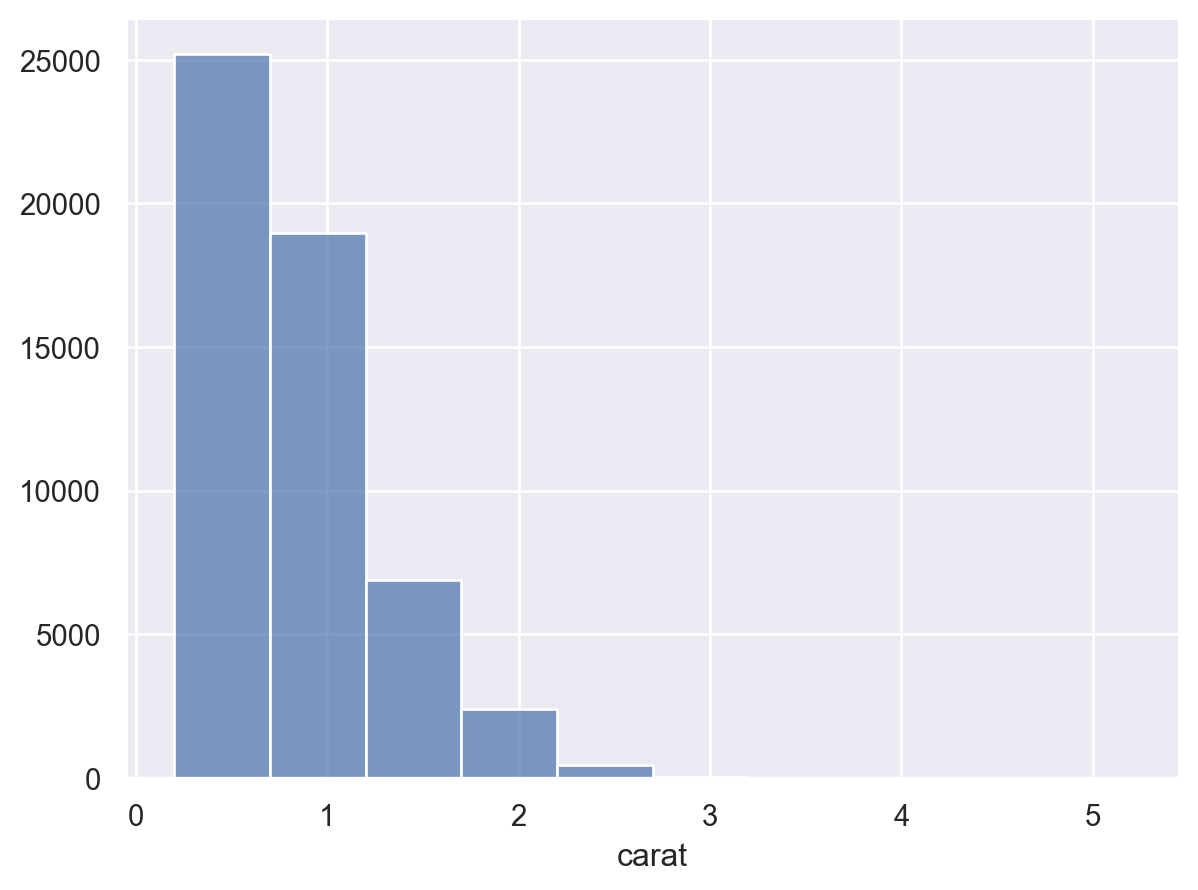

In [61]:
so.Plot(diamonds, x="carat").add(so.Bars(), so.Hist(binwidth=.5))

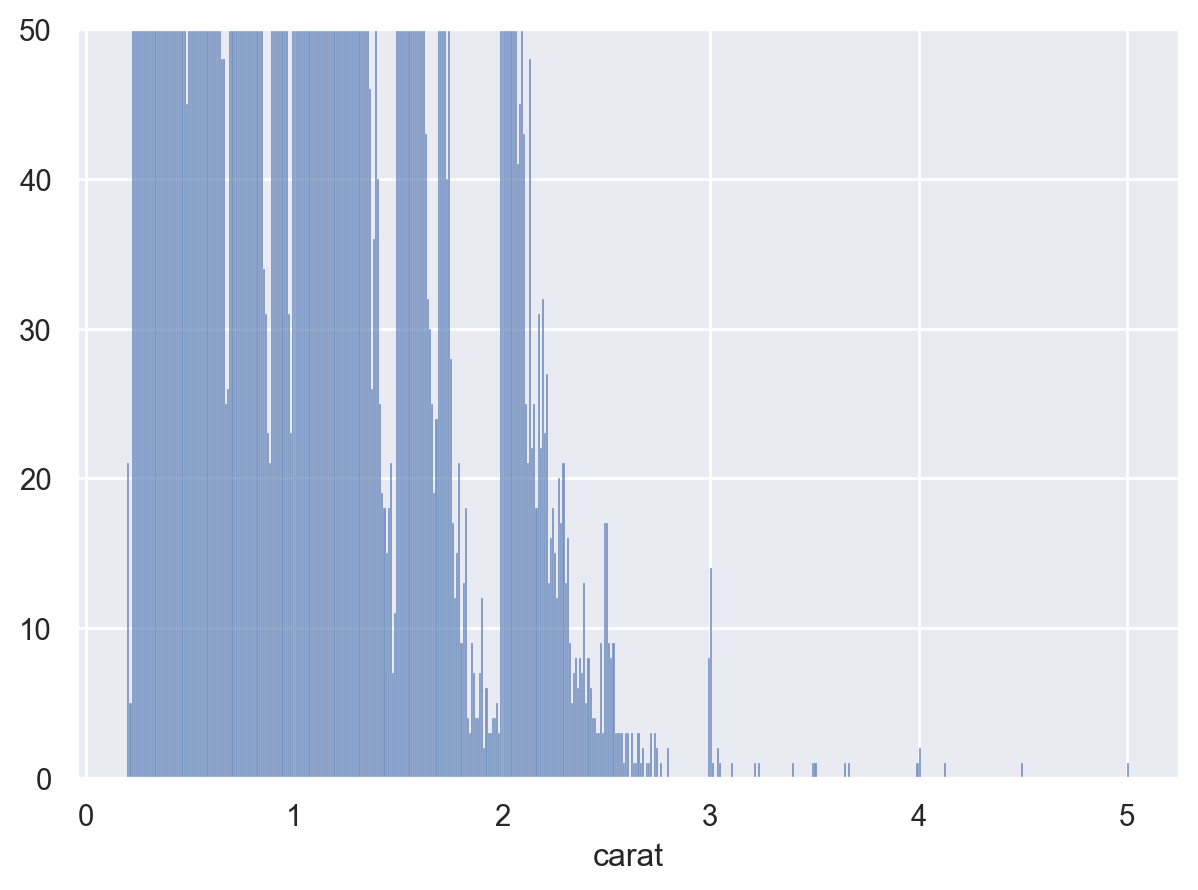

In [89]:
# Zoom-in
(
    so.Plot(diamonds, x="carat")
    .add(so.Bars(), so.Hist(binwidth=.01))
    .limit(y=(0, 50))
)

### 전형적인 값들

- 어떤 값들이 가장 흔하게 나오며, 왜 그런가?
- 어떤 값들이 가장 드물며, 왜 그런가?
- 어떤 특이한 패턴들이 있다면, 왜 그런가?

극단값들을 제거하고 확대해서 살펴보면

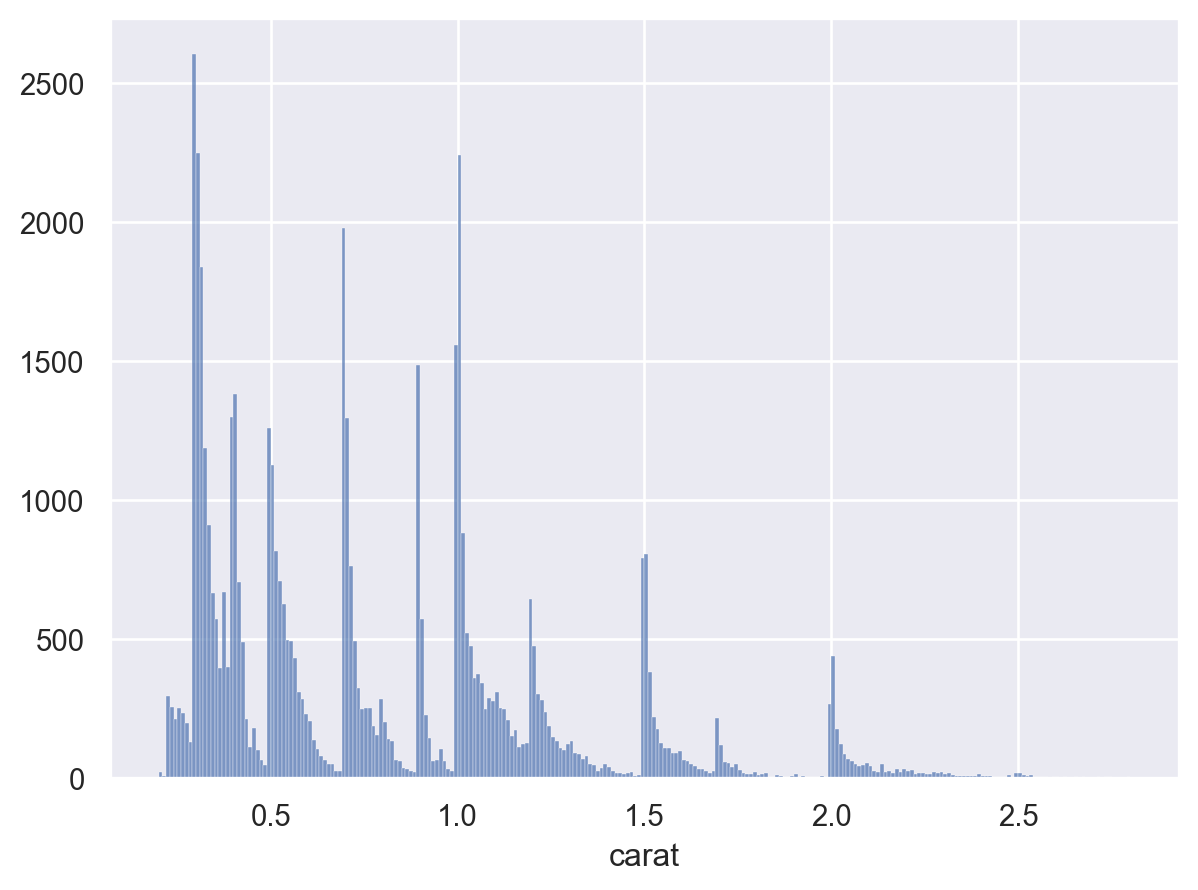

In [88]:
(
    so.Plot(diamonds.query('carat < 3'), x="carat")
    .add(so.Bars(), so.Hist(binwidth=.01))
)

다음과 같은 질문들을 해볼 수 있음

- 왜 특정 캐럿의 다이아몬드가 더 많은가?
- 왜 피크의 오른쪽으로 더 많은 다이아몬드가 있는가?
- 왜 3캐럿 이상은 거의 없는가?

군집을 이루는 패턴에 대해서는,

- 각 군집 안에서는 측정값들은 서로 비슷한 면이 있는가?
- 다른 군집 간에 측정값들는 서로 어떻게 다른가?
- 군집들이 어떻게 만들어진 것인지, 혹은 그 이유는 무엇인가?
- 군집의 모양에 현혹되어 왜 잘못된 분석으로 이끌 수 있는가?

위의 질문들은 변수들간의 관계를 탐색하도록 이끌며, 이는 다음 공변량(covariation)에서 다룰 것임.

### 특이한 값들

- 이상치(outliers)는 전형적인 패턴에서 벗어난 값들
    - 입력 오류일 수도..
    - 새로운 발견의 단초를 제공해 줄 수도...
- 이상치들을 제거하고 분석해보고
    - 그 결과에 영향을 거의 주지 않고, 이상치가 왜 있는지 알 수 없을 경우: 결측치(NA)로 대체해도 좋음
    - 그렇지 않다면, 이상치가 왜 생겼는지 조사하거나, 제거한 경우에는 결과에서 보고해야 함

Diamonds 치수(x, y, z) 중 y(width in mm)값

![](images/diamonds.png){width=600}

In [84]:
left = so.Plot(diamonds, x="y").add(so.Bars(), so.Hist(binwidth=.5))
right = so.Plot(diamonds, x="y").add(so.Bars(), so.Hist(binwidth=.5)).limit(y=(0, 30))

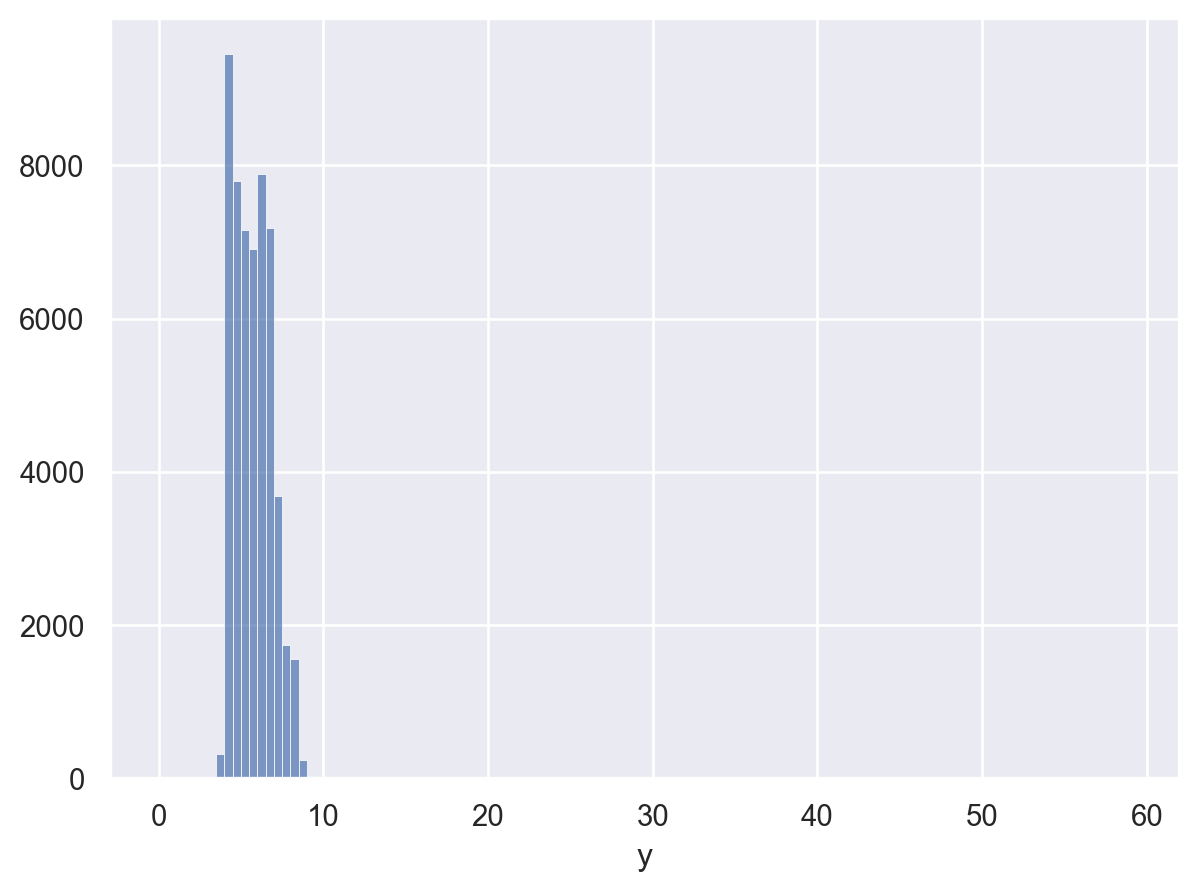

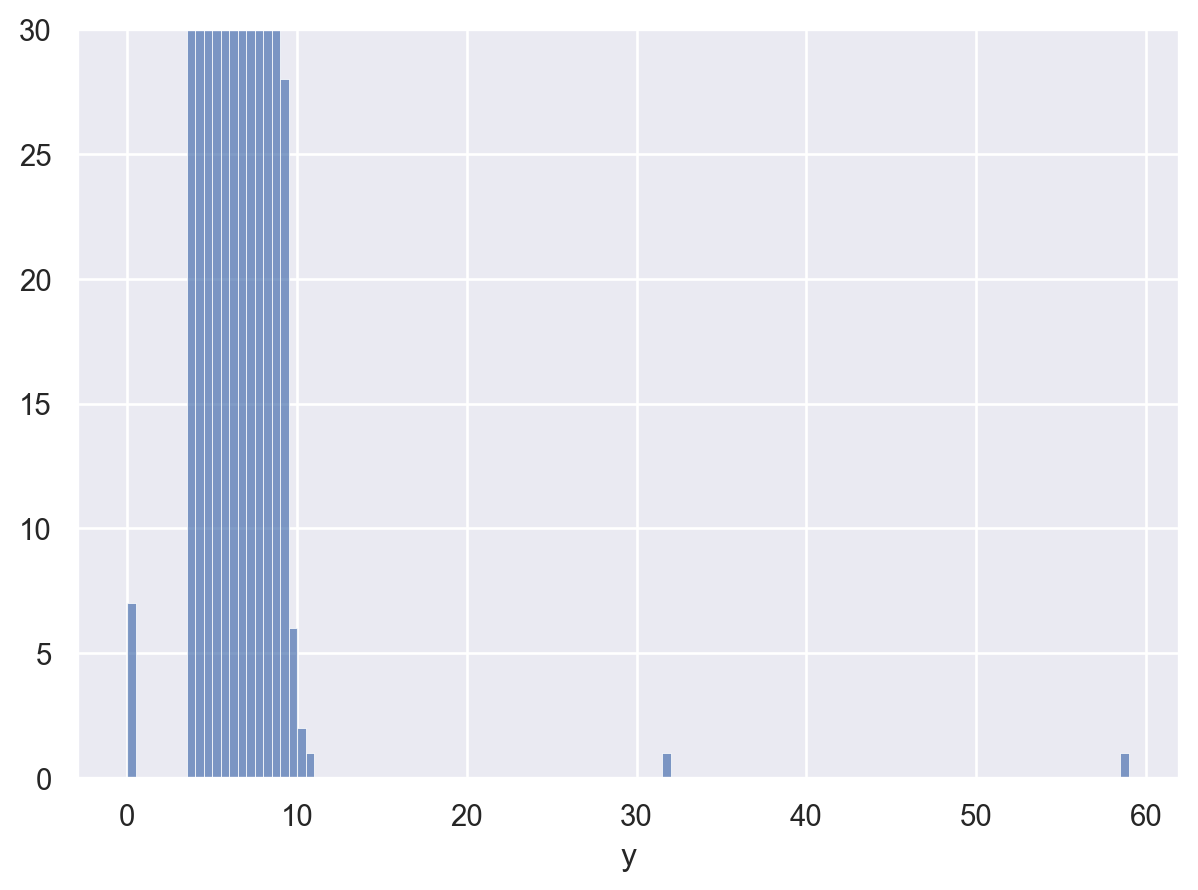

In [85]:
#| layout-ncol: 2
#| echo: false
display(left)
display(right)

In [87]:
pd.options.display.max_rows = 0
unusual = (
    diamonds[["price", "x", "y", "z"]]
    .query('y < 3 | y > 20')
    .sort_values("y")
)
unusual

       price    x     y    z
11963   5139 0.00  0.00 0.00
15951   6381 0.00  0.00 0.00
24520  12800 0.00  0.00 0.00
26243  15686 0.00  0.00 0.00
27429  18034 0.00  0.00 0.00
49556   2130 0.00  0.00 0.00
49557   2130 0.00  0.00 0.00
49189   2075 5.15 31.80 5.12
24067  12210 8.09 58.90 8.06

### 연습문제

1. Explore the distribution of each of the `x`, `y`, and `z` variables in `diamonds`. What do you learn? 
2. Explore the distribution of `price`. Do you discover anything unusual or surprising? (Hint: Carefully think about the `binwidth` and make sure you try a wide range of values.)
3. How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference?

## Unsual values
특이값을 missing (NA)으로 처리할 때는 신중하게...

특이한 값들이 있는 행을 다 제거하도록 방식을 금물!  
예를 들어, `diamonds.query('y >= 3 & y <= 20')`

만약 NA로 바꾸기로 했다면,
subsetting, `.assign()`, `np.where()`, `.mask()`를 활용

In [120]:
diamonds2 = diamonds.assign(
    y = lambda dia: np.where((dia.y < 3) | (dia.y > 20), np.nan, dia.y)
)

::: {.callout-tip}
`.mask()`
```python
diamonds2 = diamonds.copy()
diamonds2["y"].mask((diamonds2.y < 3) | (diamonds2.y > 20), np.nan, inplace=True)
```
:::


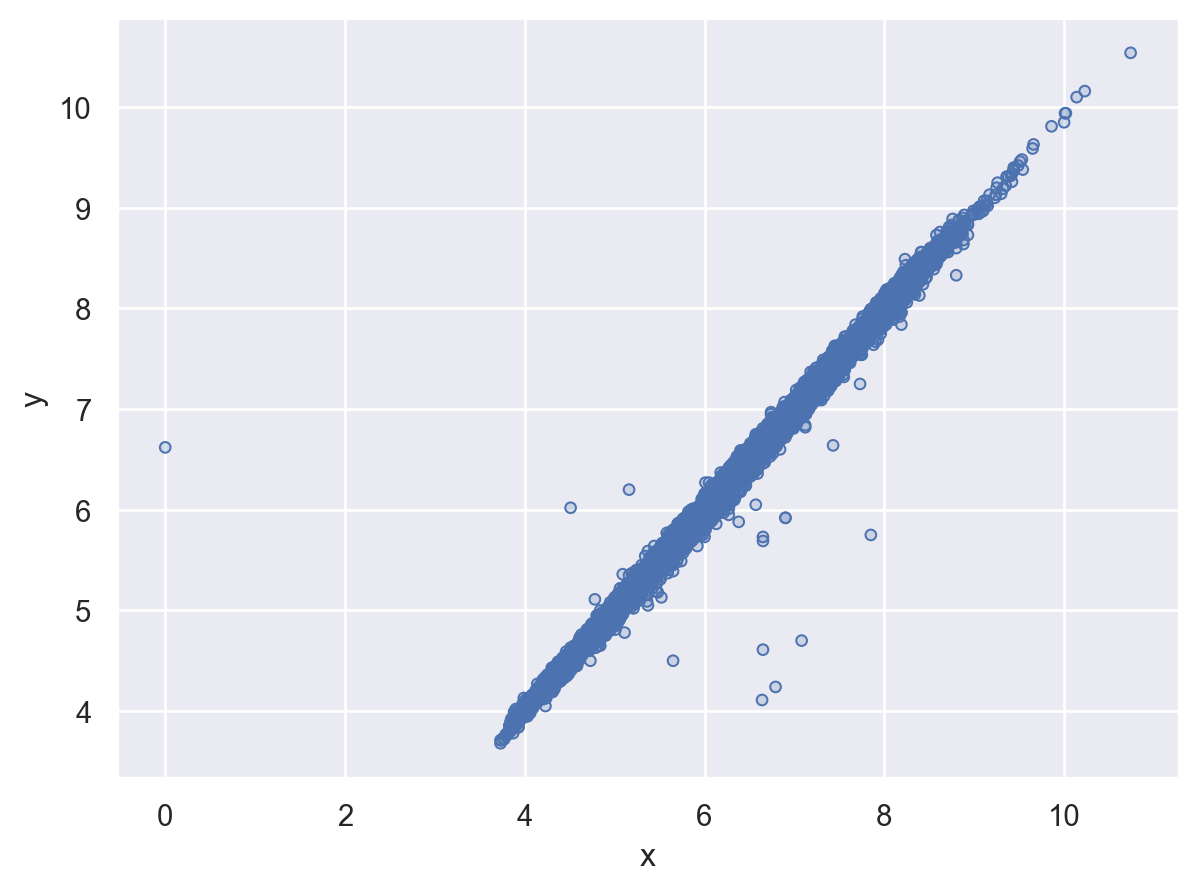

In [116]:
# NA의 제거에 대해 경고 없음!
(
    so.Plot(diamonds2, x="x", y="y")
    .add(so.Dots(alpha=1))
)

결측치들을 포함한 경우와 제거한 경우를 비교해 보고자 할 때,

- 결측치인지 아닌지를 나타내는 명목변수를 이용

In [17]:
flights = sm.datasets.get_rdataset("flights", "nycflights13").data

In [18]:
flights = flights.assign(
    cancelled = lambda x: x.dep_time.isna(),  # True/False
    sched_hour = lambda x: x.sched_dep_time // 100,
    sched_min = lambda x: x.sched_dep_time % 100,
    sched_dep_time = lambda x: x.sched_hour + x.sched_min / 60
)

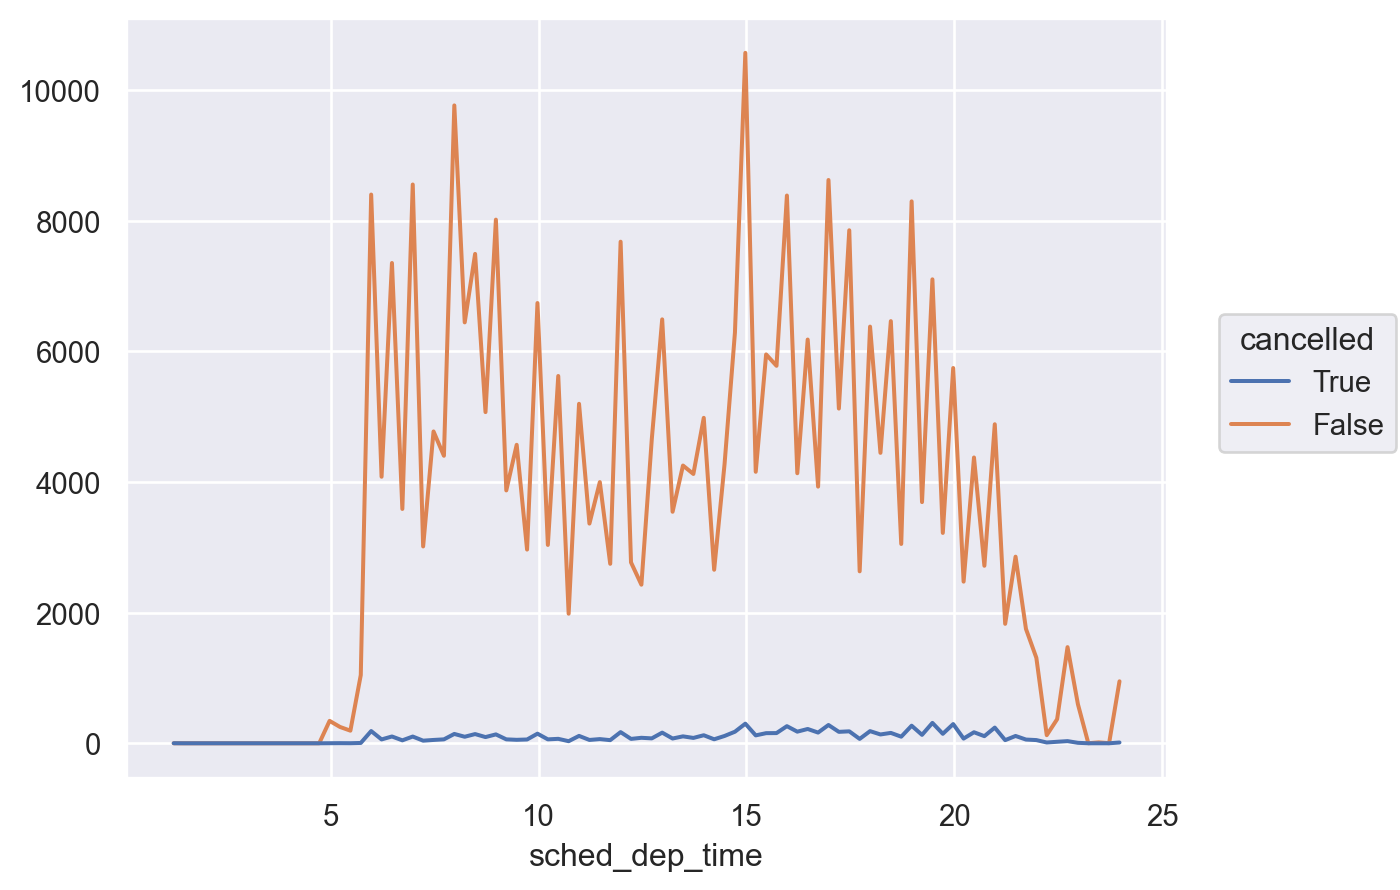

In [133]:
(
    so.Plot(flights, x="sched_dep_time", color="cancelled")
    .add(so.Line(), so.Hist(binwidth=1/4))
)

# Covariation (공변성, 공분산도)

- 변수들이 어떤 관계를 맺어 함께 변하는 경향성
- 관계를 맺는 변수들이 categorical인지 continuous인지에 따라 시각화에 차이
- 공변성에 대한 정도, 즉 얼마나 강한 관계를 지니는지를 수치로 나타내는 다양한 지표들이 통계에서 개발되었음

## A categorical and continuous variable

- 카테고리별로 분포(frequency)를 나누어 비교
- **frequency polygon** 이나 **boxplot**을 이용
- One dimensional scatter plot으로 겹치지 않게 그리려면, jitter를 활용

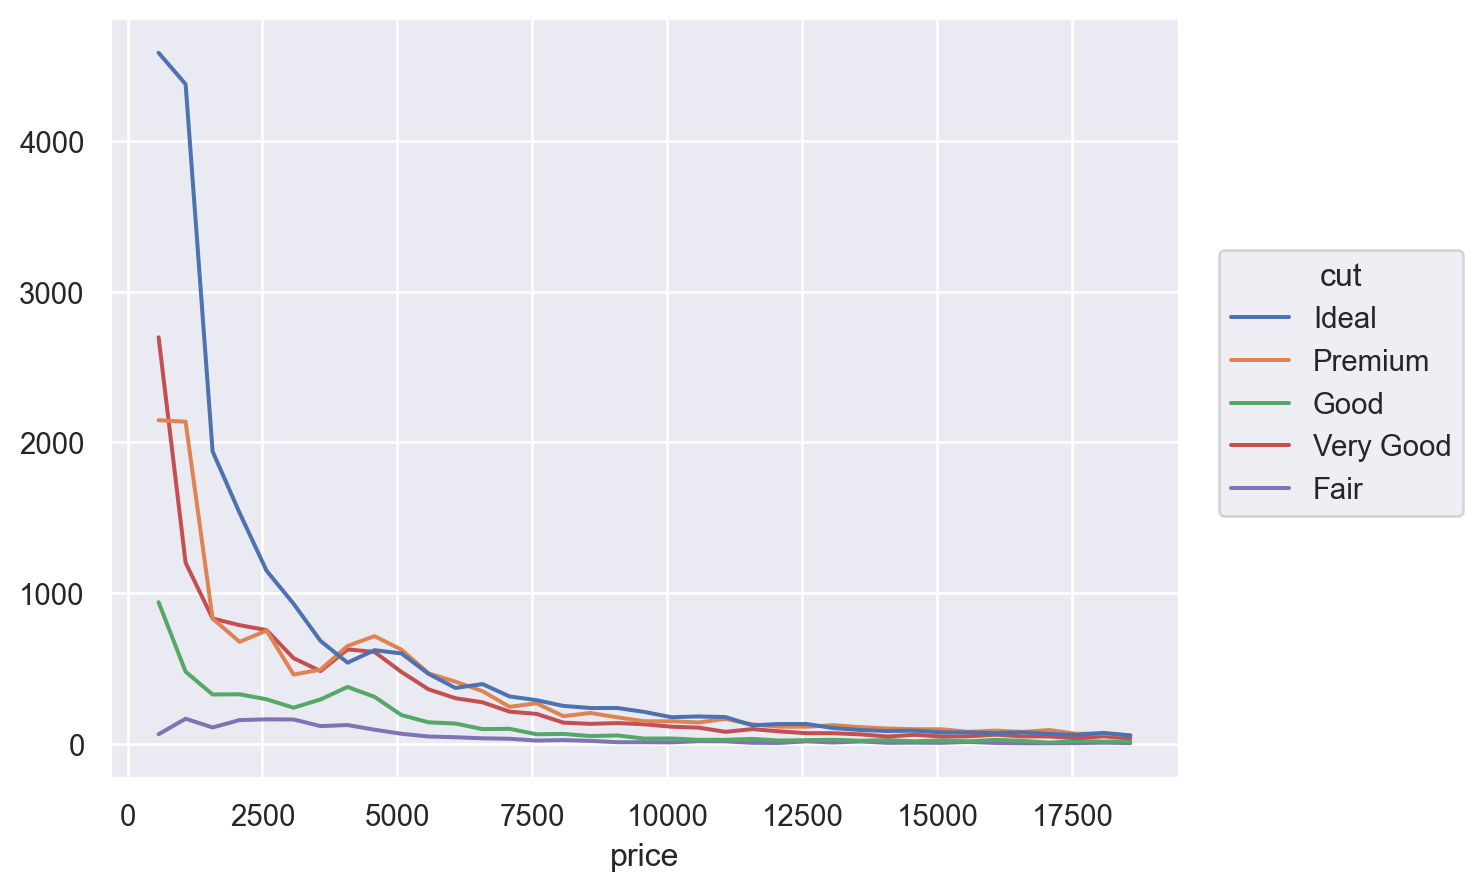

In [135]:
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Line(), so.Hist(binwidth=500))
)

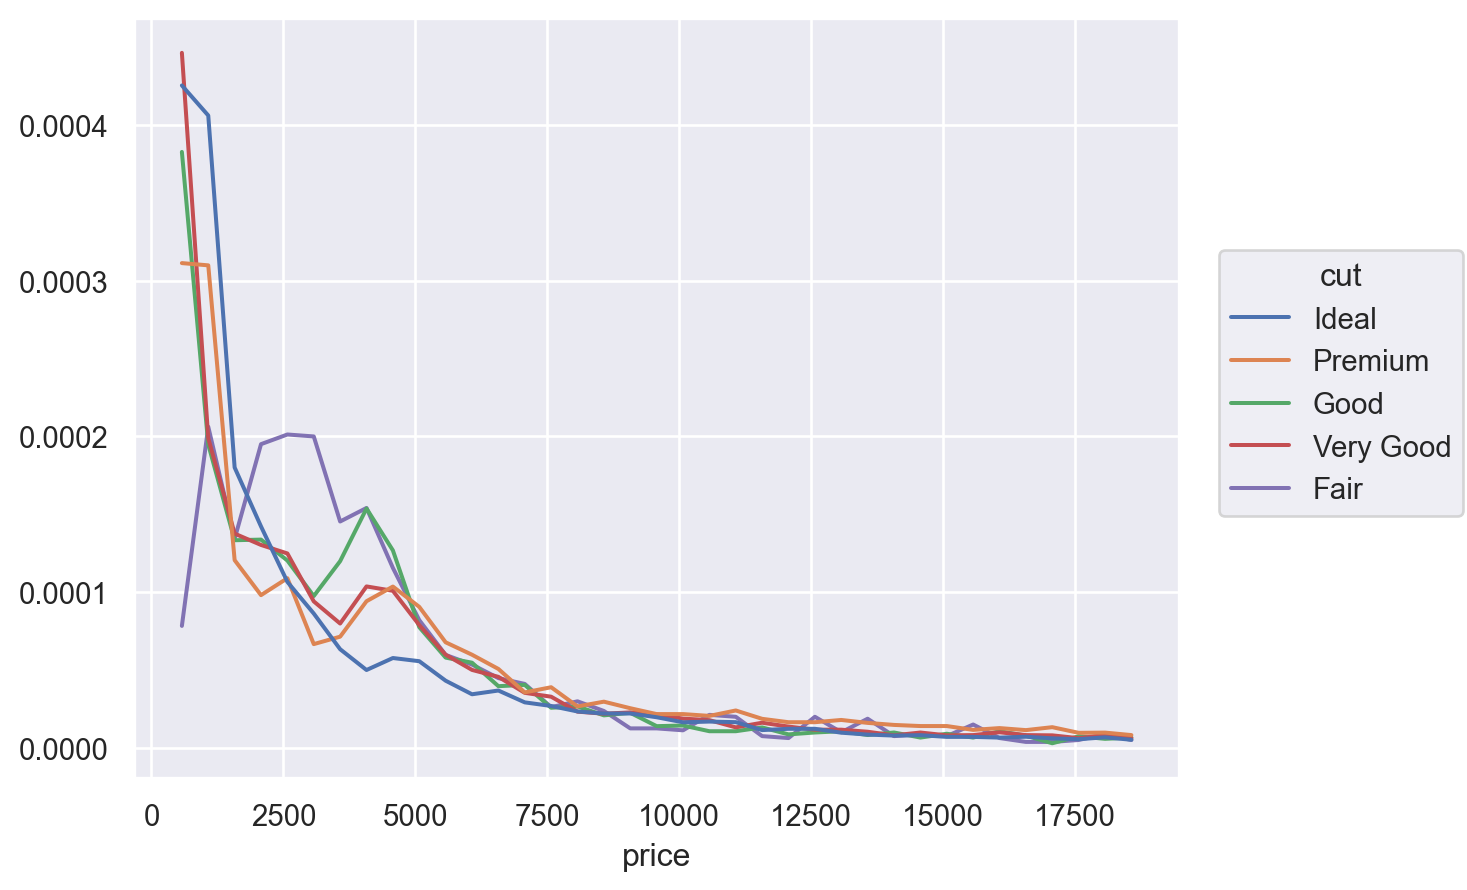

In [143]:
# 각 cut 내에서의 분포가 cut마다 어떻게 다른가 확인
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Line(), so.Hist(binwidth=500, stat="density"))
)

Q: 왜 fair 컷의 평균 가격이 가장 높은가???

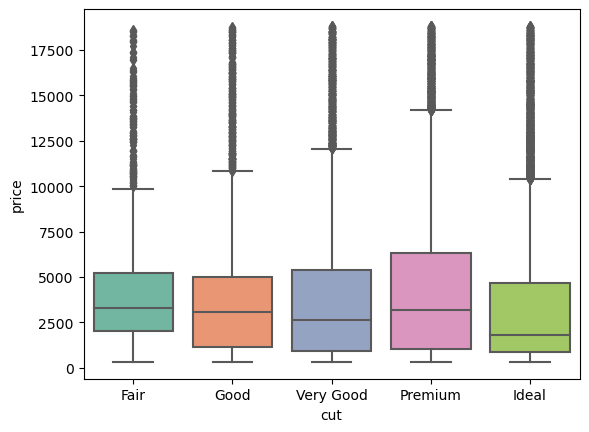

In [184]:
sns.boxplot(diamonds, x="cut", y="price", palette="Set2")
plt.show() # 생략

![](images/boxplot.png){width=700}

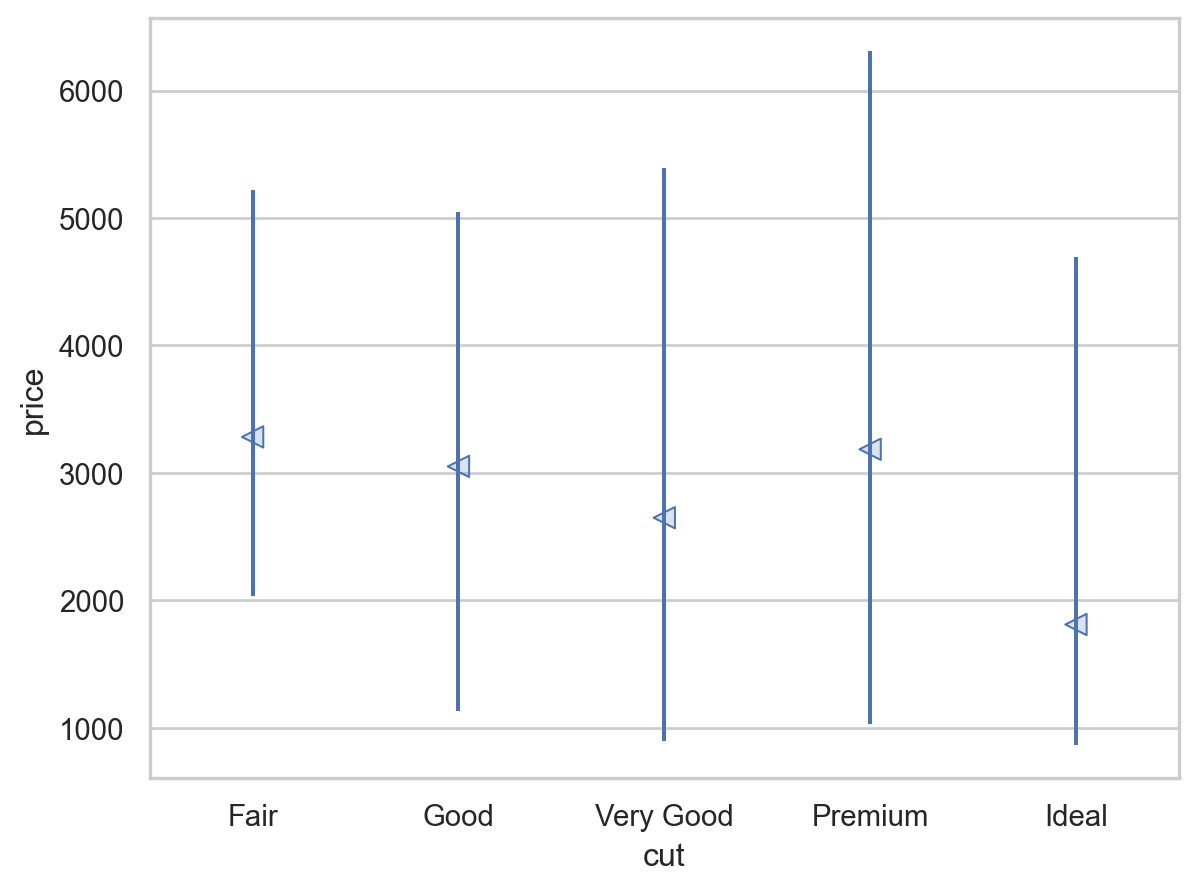

In [8]:
# Custom function
import sbcustom as sbc
sbc.rangeplot(diamonds, x="cut", y="price")

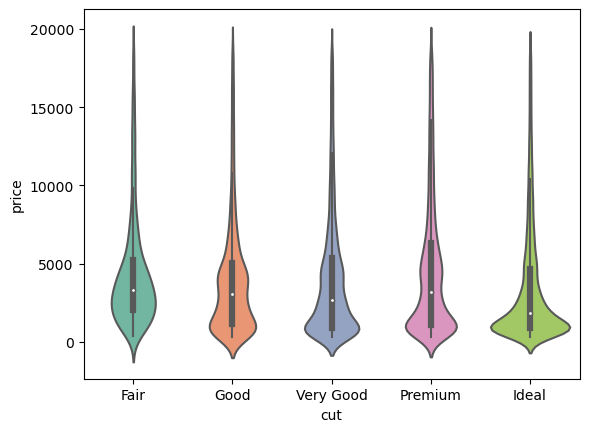

In [183]:
# Violin plot
sns.violinplot(diamonds, x="cut", y="price", palette="Set2")
plt.show() # 생략

다이아몬드 컷의 질이 낮을수록 평균 가격이 높은, 직관적으로 반대되는 패턴을 보임.

한편, 카테고리의 순서가 존재하지 않는 경우: 의미있는 순서로 재정렬하여 패턴 파악을 용이하게 할 수 있음  
예를 들어,

In [150]:
mpg = sm.datasets.get_rdataset("mpg", "ggplot2").data

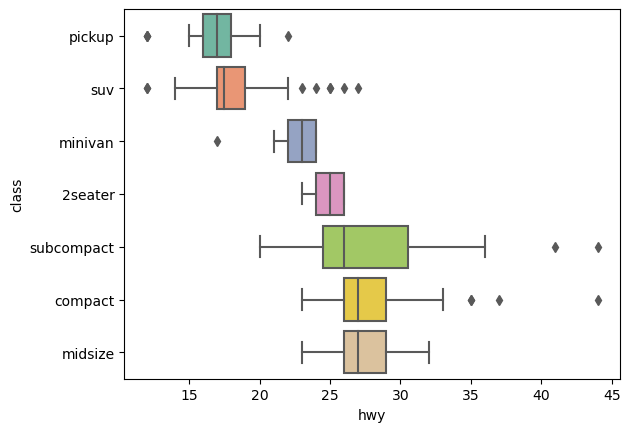

In [176]:
hwy_order = mpg.groupby("class")[["hwy"]].median().sort_values("hwy").index

sns.boxplot(mpg, y="class", x="hwy", order=hwy_order, palette="Set2")
plt.show()

### 연습문제

1. Use what you’ve learned to improve the visualisation of the departure times of cancelled vs. non-cancelled flights.
2. What variable in the diamonds dataset is most important for predicting the price of a diamond? How is that variable correlated with cut? Why does the combination of those two relationships lead to lower quality diamonds being more expensive?
3. Compare and contrast a violin plot with a facetted histogram, or a coloured frequency polygon. What are the pros and cons of each method?

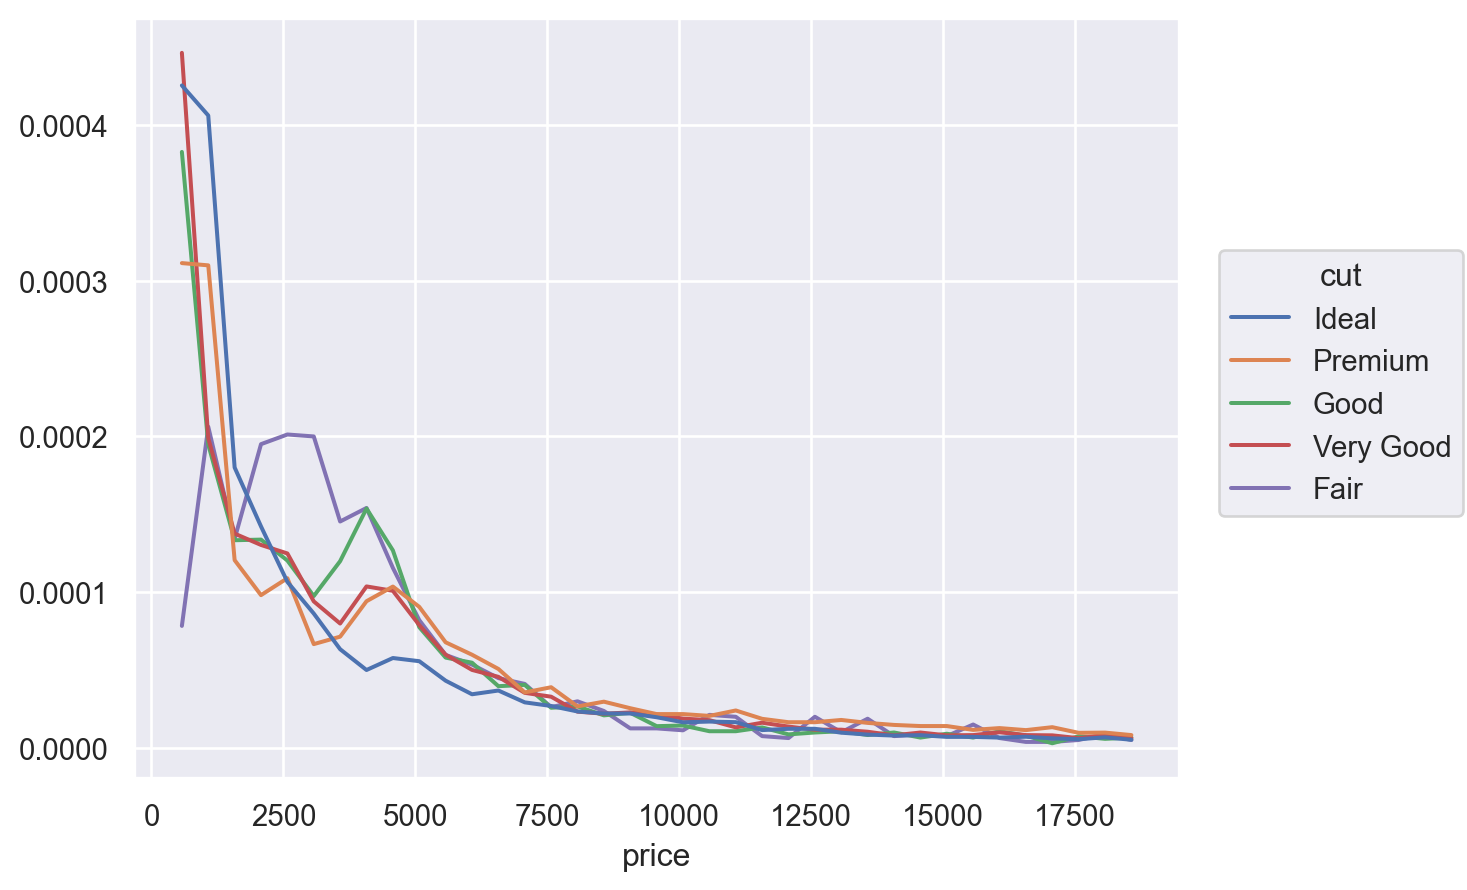

In [179]:
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Line(), so.Hist(binwidth=500, stat="density"))
)

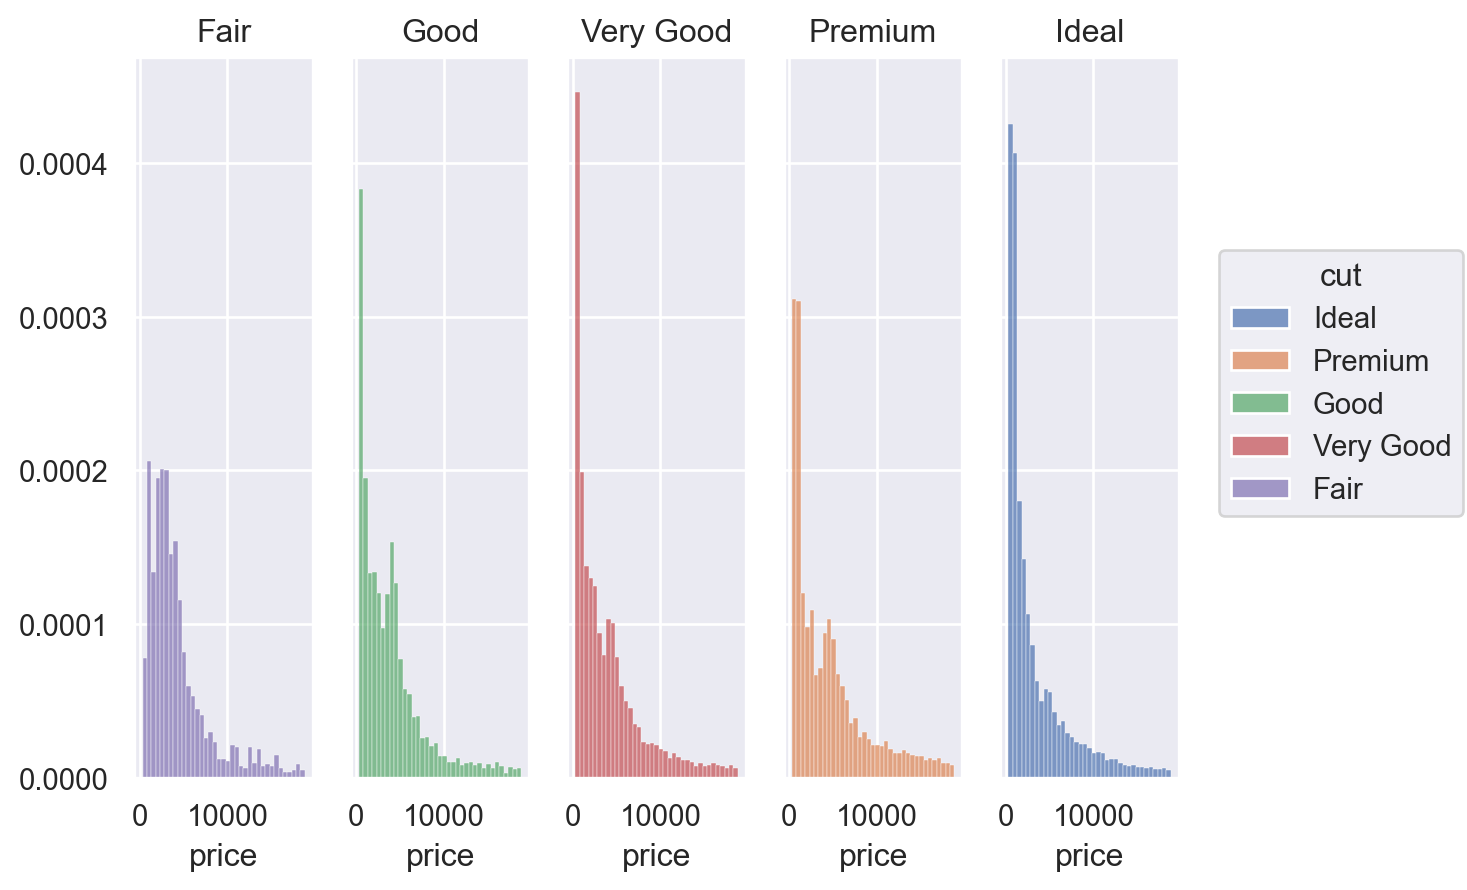

In [181]:
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Bars(), so.Hist(binwidth=500, stat="density"))
    .facet("cut")
)

## Two categorical variables

- 두 범주형 변수 사이의 covariation을 파악하려면, 두 변수 값의 모든 조합에 대한 count를 표시

In [189]:
table_cut = diamonds.groupby(["cut", "color"]).size().reset_index(name="n")
table_cut

      cut color     n
0    Fair     D   163
1    Fair     E   224
2    Fair     F   312
..    ...   ...   ...
32  Ideal     H  3115
33  Ideal     I  2093
34  Ideal     J   896

[35 rows x 3 columns]

- 각 조합에 해당하는 관측값의 양에 비례하여 원의 크기가 표시
- cut와 color 사이에 상관관계를 맺는 것으로 보임

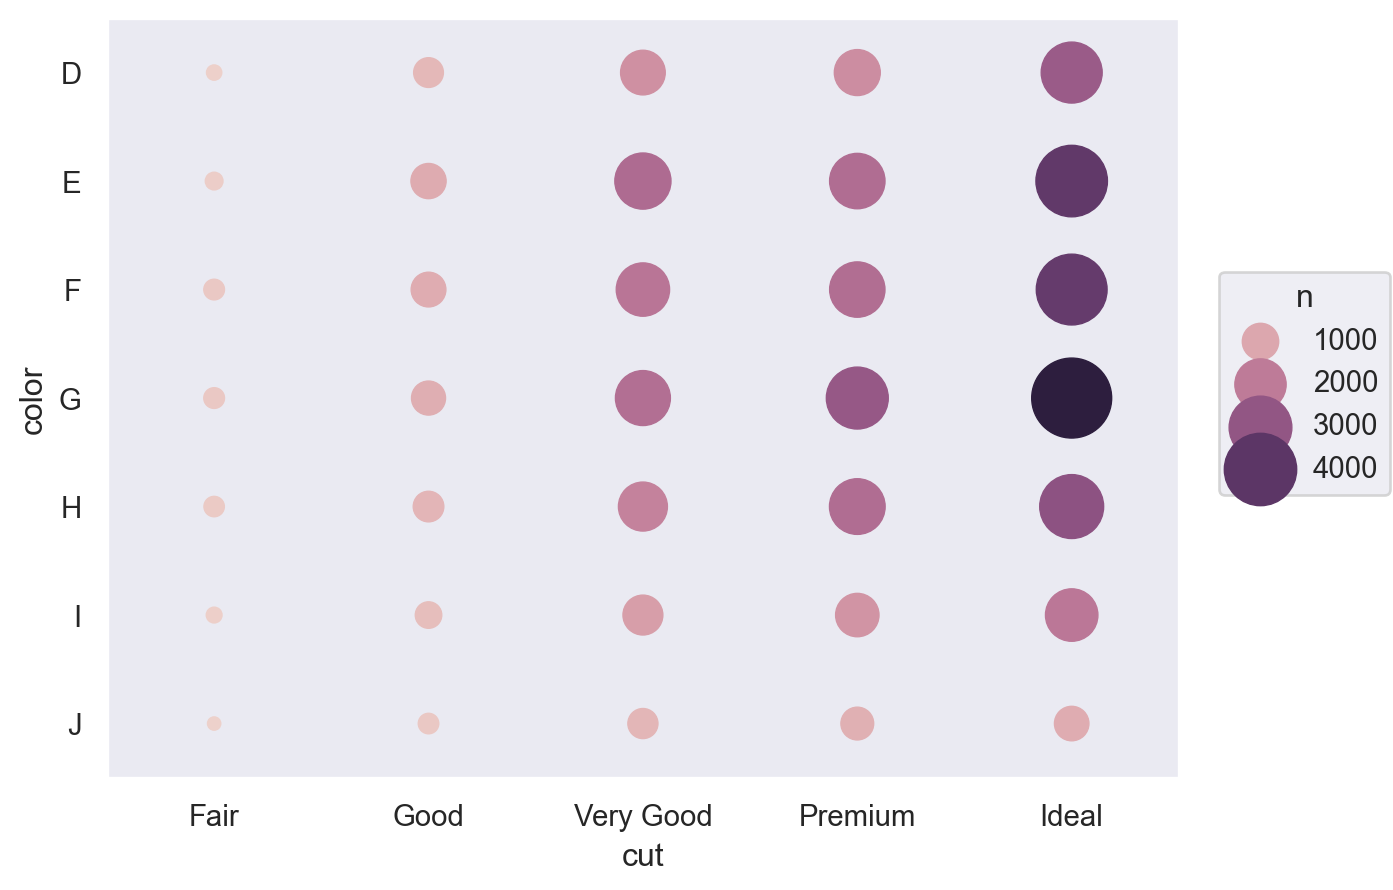

In [196]:
(
    so.Plot(table_cut, x="cut", y="color", pointsize="n", color="n")
    .add(so.Dot())
    .scale(pointsize=(5, 30))
)

순서가 없는 범주형 변수인 경우, 행과 열을 유사한 정도에 따라 순서를 매기는 알고리즘을 통해 재정렬하여 패턴을 볼 수도 있음

In [34]:
gapminder = sm.datasets.get_rdataset("gapminder", "gapminder").data
gapminder

          country continent  year  lifeExp       pop  gdpPercap
0     Afghanistan      Asia  1952    28.80   8425333     779.45
1     Afghanistan      Asia  1957    30.33   9240934     820.85
2     Afghanistan      Asia  1962    32.00  10267083     853.10
...           ...       ...   ...      ...       ...        ...
1701     Zimbabwe    Africa  1997    46.81  11404948     792.45
1702     Zimbabwe    Africa  2002    39.99  11926563     672.04
1703     Zimbabwe    Africa  2007    43.49  12311143     469.71

[1704 rows x 6 columns]

In [37]:
plotdata = (
    gapminder
    .query('continent == "Asia"')
    .pivot(index="country", columns="year", values="lifeExp")
)
plotdata

year                1952  1957  1962  1967  1972  1977  1982  1987  1992  \
country                                                                    
Afghanistan        28.80 30.33 32.00 34.02 36.09 38.44 39.85 40.82 41.67   
Bahrain            50.94 53.83 56.92 59.92 63.30 65.59 69.05 70.75 72.60   
Bangladesh         37.48 39.35 41.22 43.45 45.25 46.92 50.01 52.82 56.02   
...                  ...   ...   ...   ...   ...   ...   ...   ...   ...   
Vietnam            40.41 42.89 45.36 47.84 50.25 55.76 58.82 62.82 67.66   
West Bank and Gaza 43.16 45.67 48.13 51.63 56.53 60.77 64.41 67.05 69.72   
Yemen, Rep.        32.55 33.97 35.18 36.98 39.85 44.17 49.11 52.92 55.60   

year                1997  2002  2007  
country                               
Afghanistan        41.76 42.13 43.83  
Bahrain            73.92 74.80 75.64  
Bangladesh         59.41 62.01 64.06  
...                  ...   ...   ...  
Vietnam            70.67 73.02 74.25  
West Bank and Gaza 71.10 72.37 73.42  
Yem

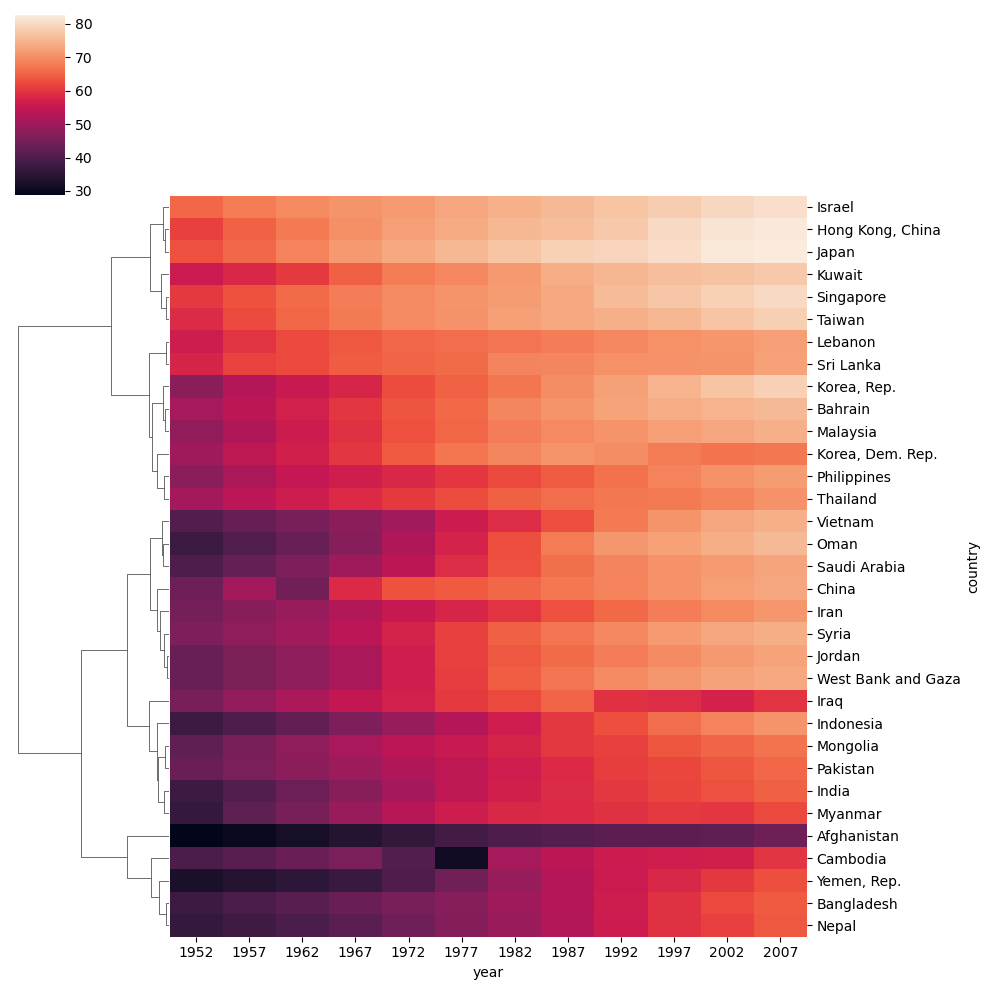

In [45]:
# hierarchical clustering in scipy
sns.clustermap(plotdata, col_cluster=False, method="ward")

### 연습문제

1. How could you rescale the count dataset above to more clearly show the distribution of cut within colour, or colour within cut?
    - count 대신 비율을 계산 후 그려보세요.
    - 예를 들어, color D에 cut 각각의 비율들을 구해 시각화
2. Explore how average flight departure delays vary by destination and month of year. What makes the plot difficult to read? How could you improve it?
    - `groupby(["month", "dest"])`로 그룹핑을 해서 시작해 볼 것
    - 결측치를 어떻게 처리하면 좋을지 생각해 볼 것
    - `sns.clustermap()`도 그려볼 것

## Two continuous variables
- Scatterplot, 2d-histogram
- Discretize: `pd.cut()`, `pd.qcut()`

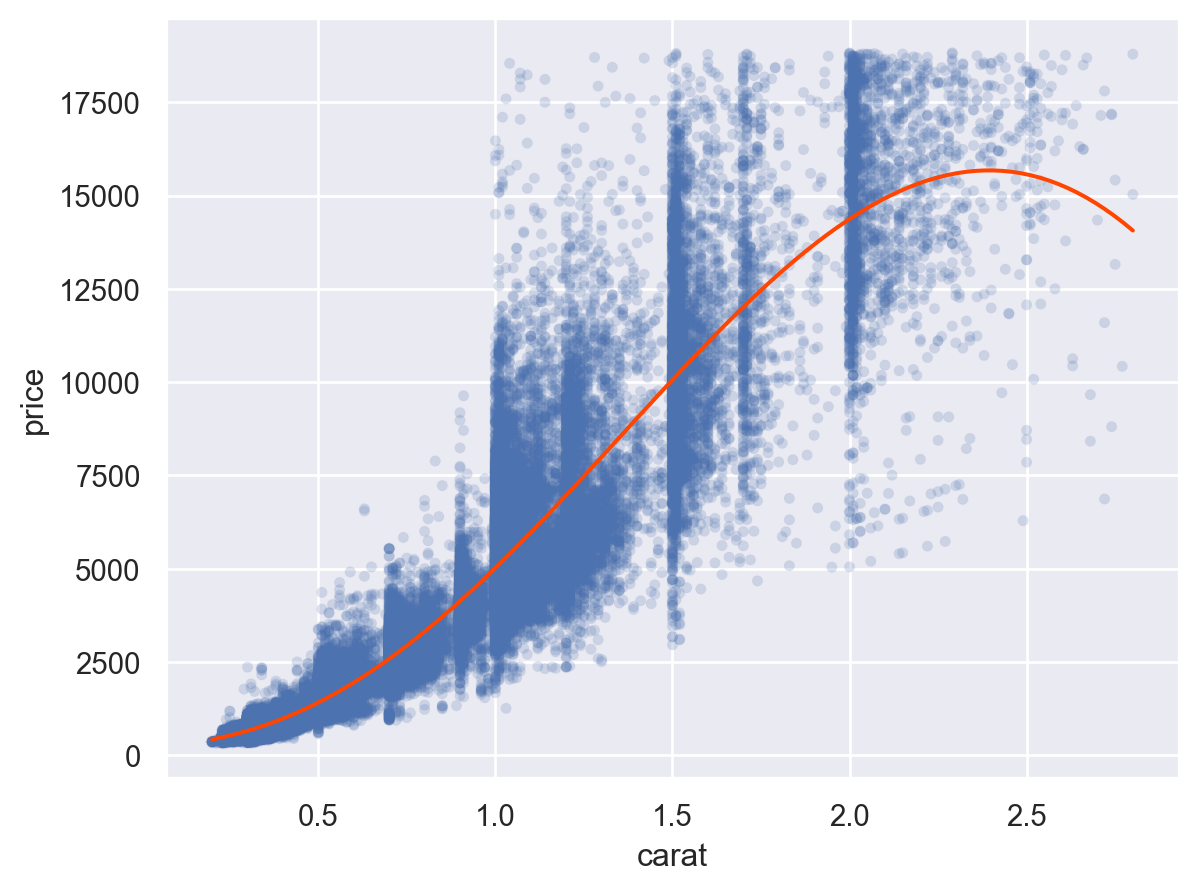

In [7]:
(
    so.Plot(diamonds.query('carat < 3'), x="carat", y="price")
    .add(so.Dots(alpha=1/100))
    .add(so.Line(color="orangered"), so.PolyFit(5))
)

2d-histogram: x, y축 모두 binning

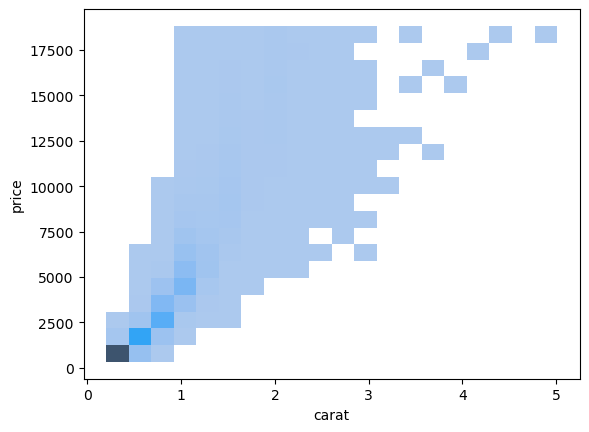

In [9]:
sns.histplot(diamonds, x="carat", y="price", bins=20)
plt.show()

Discretize: 연속 변수를 카테고리화

In [55]:
diamonds_cat = diamonds.query("carat < 3").assign(
    carat_cat=lambda x: pd.cut(x.carat, 20, labels=False),
    carat_qcat=lambda x: pd.qcut(x.carat, 20, labels=False),
)

<Axes: xlabel='carat_cat', ylabel='price'>

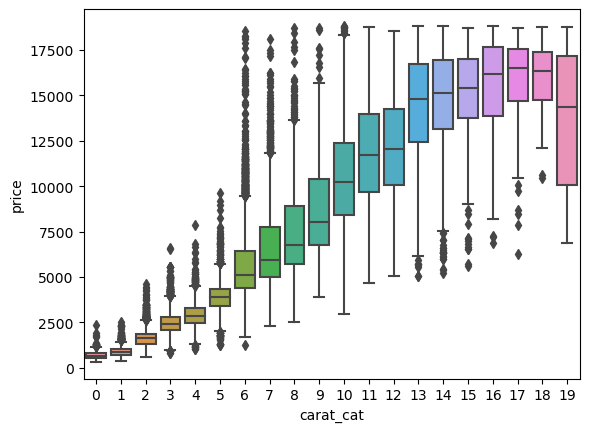

In [49]:
sns.boxplot(diamonds_cat, x="carat_cat", y="price")

<Axes: xlabel='carat_qcat', ylabel='price'>

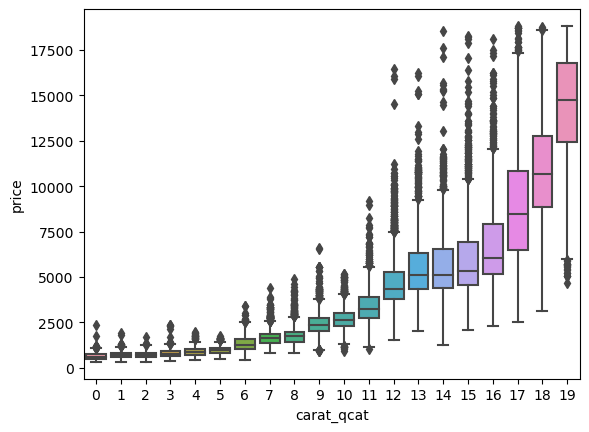

In [56]:
sns.boxplot(diamonds_cat, x="carat_qcat", y="price")

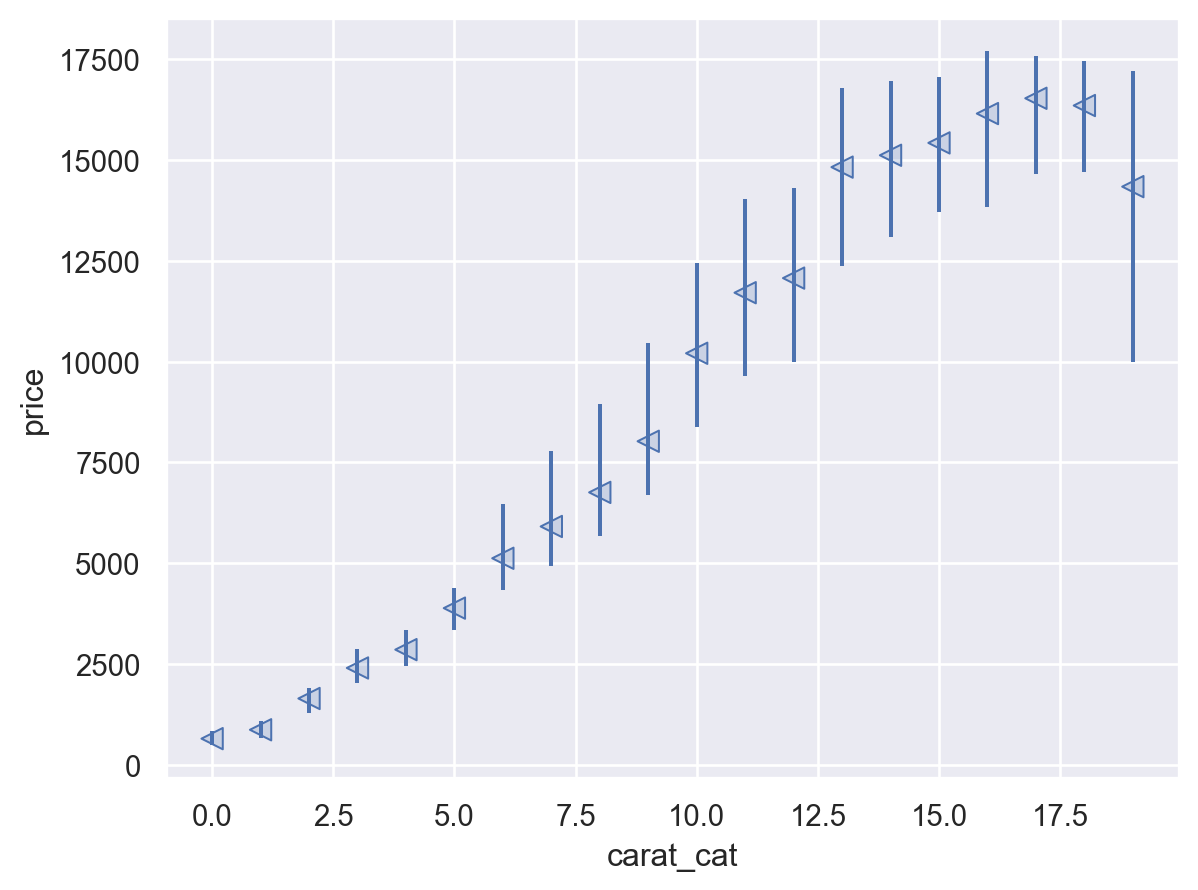

In [48]:
(
    so.Plot(diamonds_cat, x="carat_cat", y="price")
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)))
    .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"))
)

### 연습문제

1. Instead of summarising the conditional distribution with a boxplot, you could use a frequency polygon.
    - 즉, 두 연속변수 중 하나를 카테고리화하는데, boxplot대신 frequency polygon으로 그려볼 것
2. Visualise the distribution of carat, partitioned by price.
3. How does the price distribution of very large diamonds compare to small diamonds? Is it as you expect, or does it surprise you?
4. Combine two of the techniques you’ve learned to visualise the combined distribution of cut, carat, and price.
5. Two dimensional plots reveal outliers that are not visible in one dimensional plots. For example, some points in the plot below have an unusual combination of `x` and `y` values, which makes the points outliers even though their `x` and `y` values appear normal when examined separately.  
Why is a scatterplot a better display than a binned plot for this case?

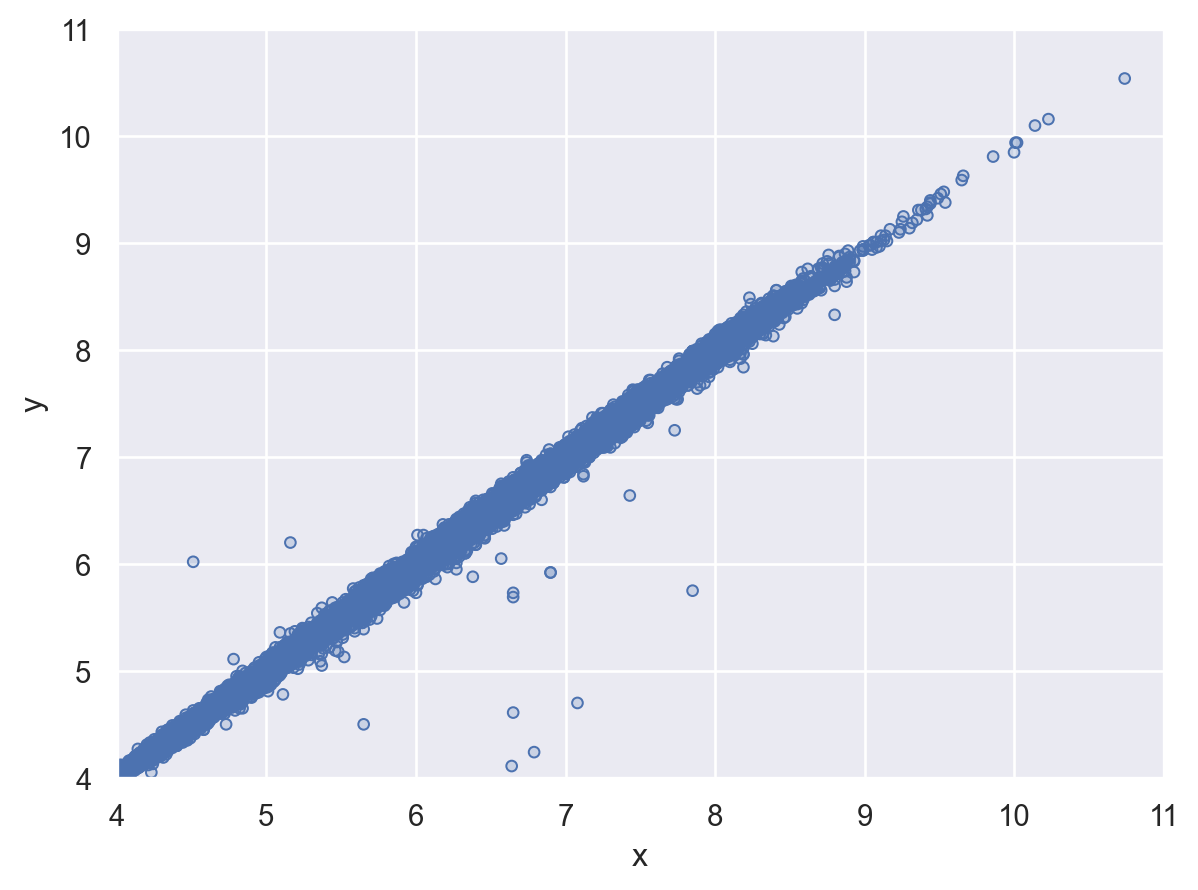

In [61]:
(
    so.Plot(diamonds, x='x', y='y')
    .add(so.Dots())
    .limit(x=(4, 11), y=(4, 11))
)

# Patterns and models

- 만약 두 변수 간의 체계적인 관계가 있다면, 데이터에서 어떤 식으로든 패턴으로 나타날 것이고, 이러한 패턴을 찾으면서 변수 간의 진정한 관계를 추적해 나감.
- 패턴은 데이터 분석가에게 가장 유용한 도구 중 하나임
- 패턴을 발견했다면, (잠정적) 모형(model)을 명시적으로 세운 후 탐색을 진행

패턴을 발견했다면 다음과 같은 질문을 해 볼 것

- 이 패턴이 우연에 의한 것인가?
- 이 패턴이 암시하는 관계를 어떻게 묘사해 볼 수 있는가?
- 이 패턴이 암시하는 관계가 얼마나 강한가?
- 어떤 다른 변수들이 이 관계에 영향을 줄 수 있는가? ex) 운동의 효과가 어느 때 하는가에 달라지는가?
- 데이터의 하위그룹별로 봤을 때, 이 관계가 변하는가? ex) 남녀에게 효과가 다른가?


::: {layout-ncol=2}
### Example: Old Faithful eruption (간헐천)  
<br>
eruption duration (mins) vs.  
wait time (mins) between eruptions

![](images/faithful.png){width=300}
:::

In [441]:
faithful = sm.datasets.get_rdataset("faithfuld", "ggplot2").data

In [448]:
faithful["waiting_cat"] = pd.cut(faithful["waiting"], 10)

In [449]:
faithful.groupby("waiting_cat")["eruptions"].mean()

waiting_cat
(42.947, 48.3]   3.35
(48.3, 53.6]     3.35
(53.6, 58.9]     3.35
                 ... 
(80.1, 85.4]     3.35
(85.4, 90.7]     3.35
(90.7, 96.0]     3.35
Name: eruptions, Length: 10, dtype: float64

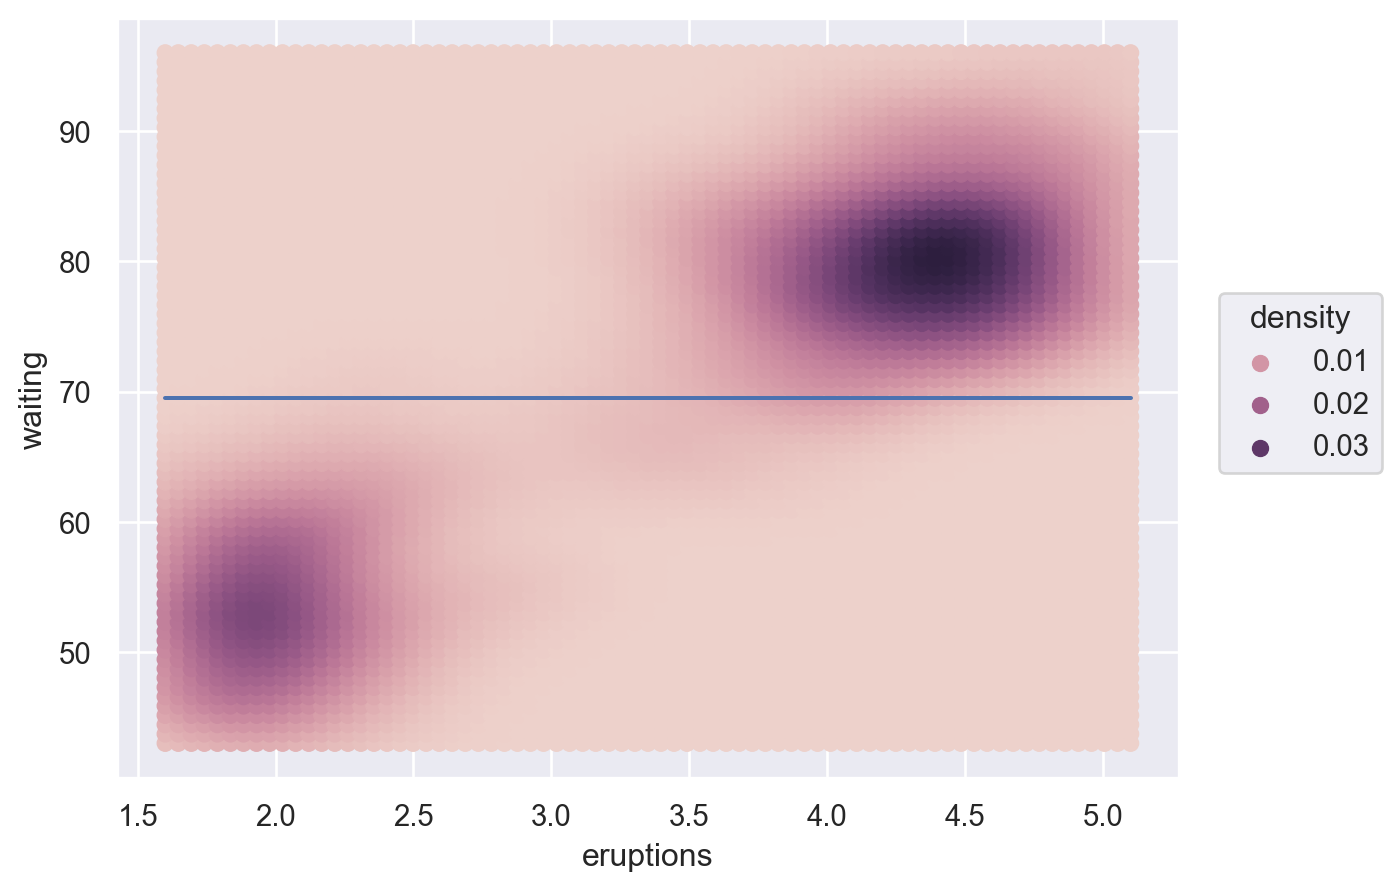

In [447]:
(
    so.Plot(faithful, x='eruptions', y='waiting', color="density")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(5), color=None)
)

패턴:

- 오래 있다가 분출할 수록 더 오랜 기간 분출
- 두개의 군집을 형성

> *If you think of **variation** as a phenomenon that **creates uncertainty**, **covariation** is a phenomenon that **reduces it**. If two variables covary, you can use the values of one variable to make better **predictions** about the values of the second. If the covariation is due to a causal relationship (a special case), then you can use the value of one variable to **control** the value of the second.*

패턴이 보이면, 이를 구체적으로 명시하는 모델을 세워 분석을 진행

### Diamonds 데이터셋

컷(cut)과 가격(price)의 관계는 예상과 달랐는데, 이는 컷(cut)과 무게(carat), 무게(carat)와 가격(price) 사이에 깊은 관계가 있었기 때문임.

In [97]:
#| echo: false
left = (
    so.Plot(diamonds, x='cut', y='price')
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)))
    .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"))
)
right = (
    so.Plot(diamonds, x='cut', y='carat')
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)))
    .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"))
)
bottom = (
    so.Plot(diamonds.query('carat < 3'), x='carat', y='price')
    .add(so.Dots(alpha=1/200, color=".5"))
    .add(so.Line(color="deepskyblue"), so.PolyFit(5))
)

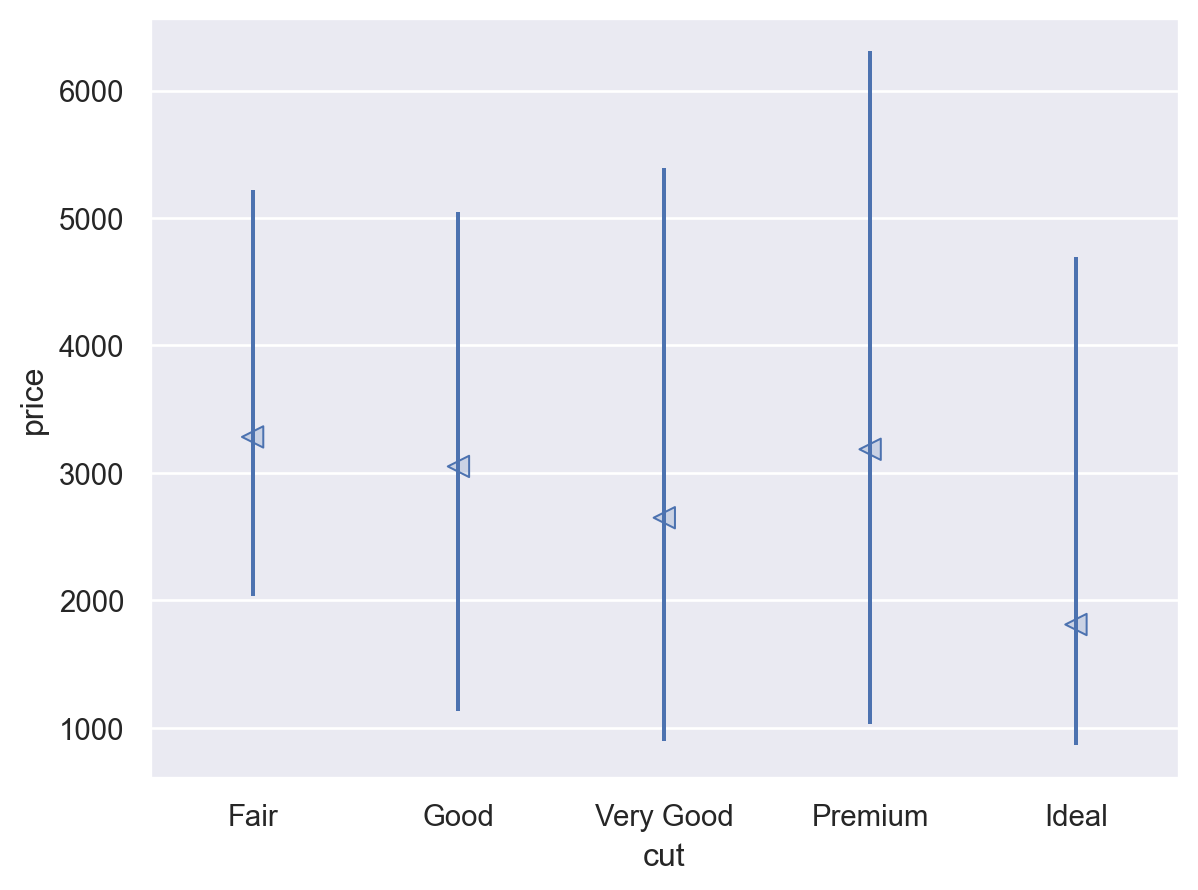

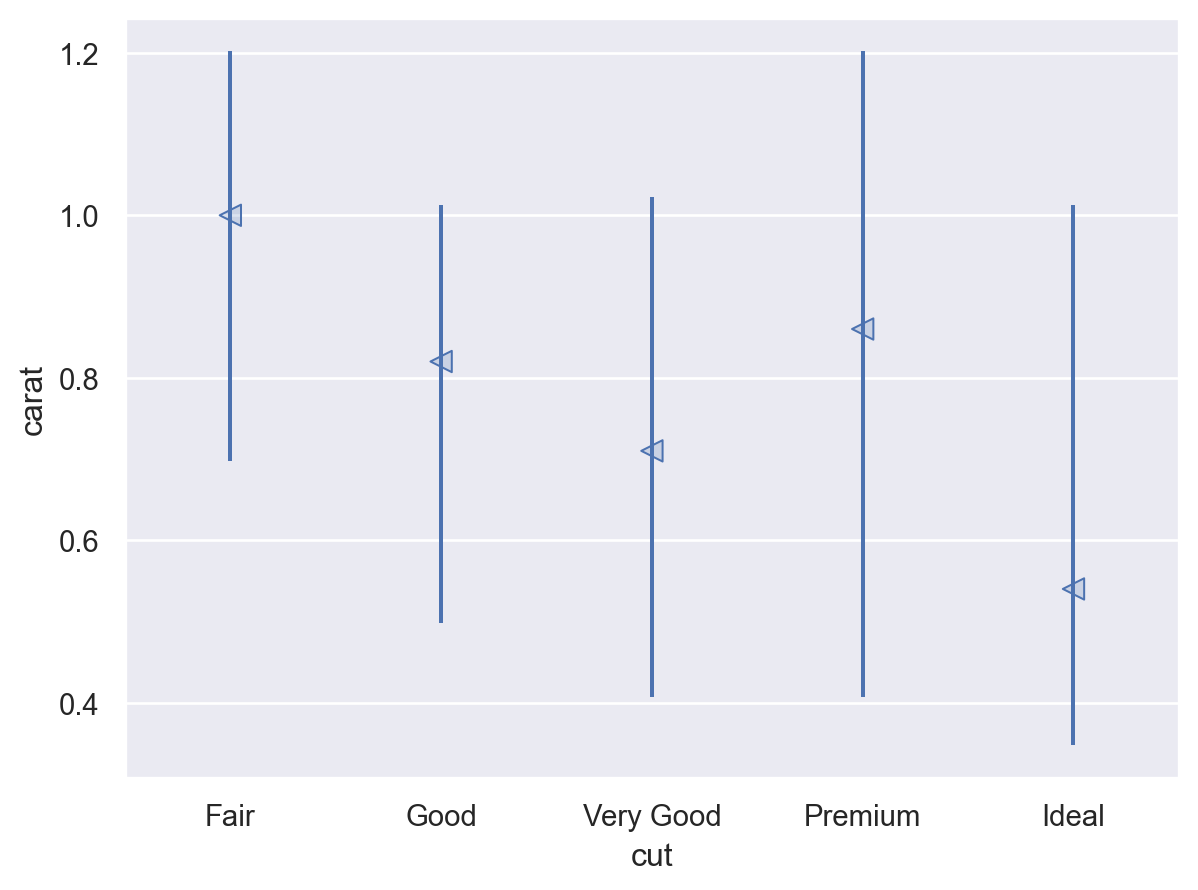

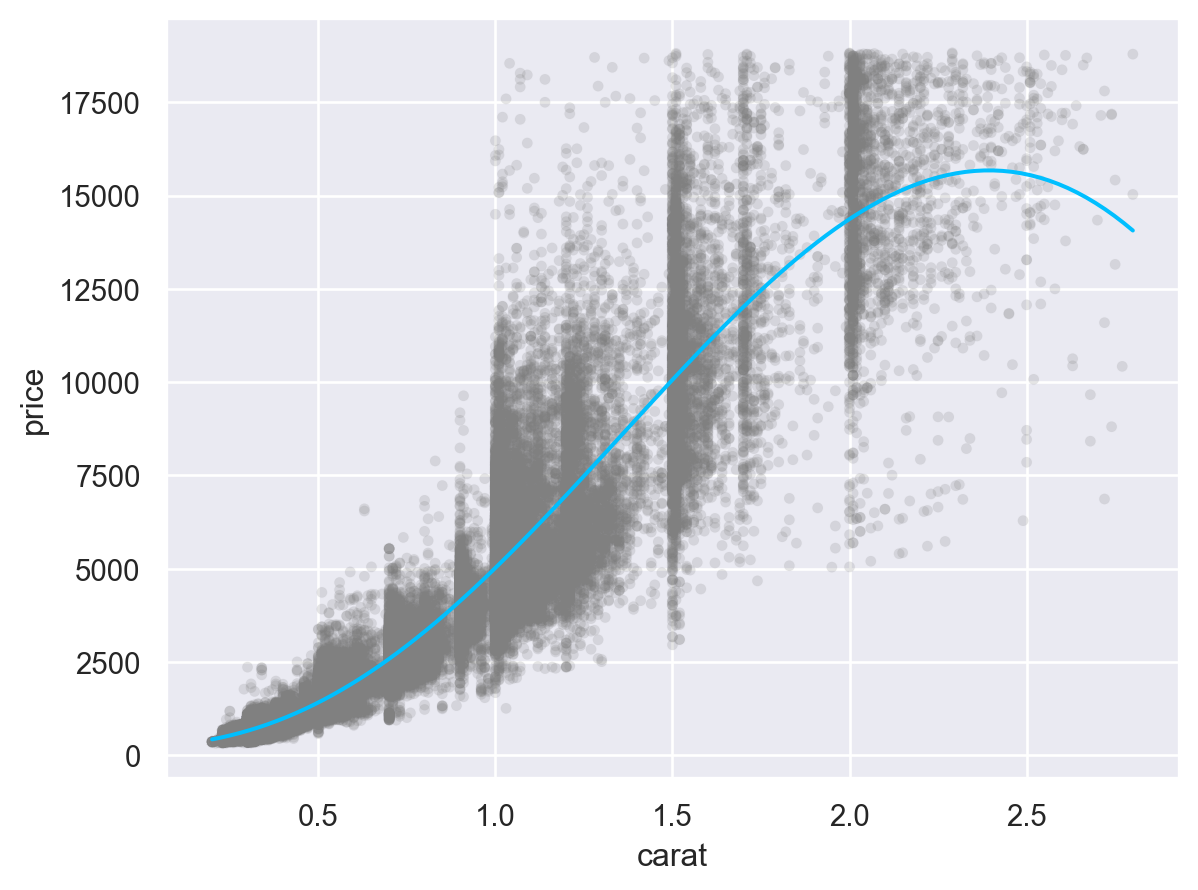

In [98]:
#| echo: false
#| layout-ncol: 2
display(left)
display(right)
display(bottom)

모델링을 통해 가격(price)과 크기(carat) 사이의 강한 관계를 제거할 수 있도록 모델을 세울 수 있음

- 캐럿 당 가격으로 처리?

**이 관계를 제거한 후 남은 패턴**을 탐색할 수 있음

Build a model!  

- Linear model, 선형(직선) 모형을 여기서는 특히, $y = b_1x + b_0$인 1차 함수꼴의 모형으로 세움
- $log(price) =  b_1 * log(carat) + b_0 + e$ (**residual, 잔차**)의 모형을 세운 후 데이터에 가장 부합(**fit**)하는 파라미터 $b_1, b_0$ 값을 구하는 과정: **fitted model**  

![](images/model3.png){width=500}

::: {.callout-note collapse=true}
#### Code

```python
import statsmodels.formula.api as smf

diamonds2 = diamonds.assign(
    log_carat = np.log(diamonds.carat),
    log_price = np.log(diamonds.price)
)

diamonds_fit = smf.ols('log_price ~ log_carat', data=diamonds2).fit()

diamonds2 = diamonds2.assign(
    log_pred = diamonds_fit.fittedvalues,
    log_resid = diamonds_fit.resid,
    pred = lambda x: np.exp(x.log_pred),
    resid = lambda x: np.exp(x.log_resid),
    resid_diff = lambda x: x.price - x.pred
)

diamonds2[["cut", "carat", "price", "pred", "resid", "resid_diff"]]
```
:::

In [30]:
#| echo: false
import statsmodels.formula.api as smf

diamonds2 = diamonds.assign(
    log_carat = np.log(diamonds.carat),
    log_price = np.log(diamonds.price)
)

diamonds_fit = smf.ols('log_price ~ log_carat', data=diamonds2).fit()

diamonds2 = diamonds2.assign(
    log_pred = diamonds_fit.fittedvalues,
    log_resid = diamonds_fit.resid,
    pred = lambda x: np.exp(x.log_pred),
    resid = lambda x: np.exp(x.log_resid),
    resid_diff = lambda x: x.price - x.pred
)

diamonds2[["cut", "carat", "price", "pred", "resid", "resid_diff"]]

             cut  carat  price    pred  resid  resid_diff
0          Ideal   0.23    326  397.72   0.82      -71.72
1        Premium   0.21    326  341.48   0.95      -15.48
2           Good   0.23    327  397.72   0.82      -70.72
...          ...    ...    ...     ...    ...         ...
53937  Very Good   0.70   2757 2568.14   1.07      188.86
53938    Premium   0.86   2757 3626.09   0.76     -869.09
53939      Ideal   0.75   2757 2882.92   0.96     -125.92

[53940 rows x 6 columns]

In [31]:
print(diamonds_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.510e+05
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:47:53   Log-Likelihood:                -4424.2
No. Observations:               53940   AIC:                             8852.
Df Residuals:                   53938   BIC:                             8870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4487      0.001   6190.896      0.0

In [32]:
# import sklearn regression models
from sklearn.linear_model import LinearRegression

# create linear model where x is log_carat and y is log_price
lm = LinearRegression()
lm.fit(diamonds2[["log_carat"]], diamonds2[["log_price"]])

# show coefficients
print(lm.coef_)

# print intercept
print(lm.intercept_)

# print R-squared
print(lm.score(diamonds2[["log_carat"]], diamonds2[["log_price"]]))

[[1.68]]
[8.45]
0.9329893079520857


- residuals (잔차)은 모형이 예측하지 못하는 정도를 나타내며, 그것들의 총체를 줄이는 것이 좋은 모형임.
    - 총체를 구하는 방법에는 여러가지가 있음.

- 크기(carat)로 가격(price)을 **예측/설명(account for)**하는 정도를 제거한 후, 즉, 크기(carat)로 예측/설명되지 않는 가격(price)의 정도에 대해서 다른 변수들과의 관계를 탐구

::: {.callout-note collapse=true}
#### Code

```python
hline = pd.DataFrame({"x": [0, 5], "y": [1, 1]})
(
    so.Plot(diamonds2, x='carat', y='resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), x=hline.x, y=hline.y)
)
```
:::

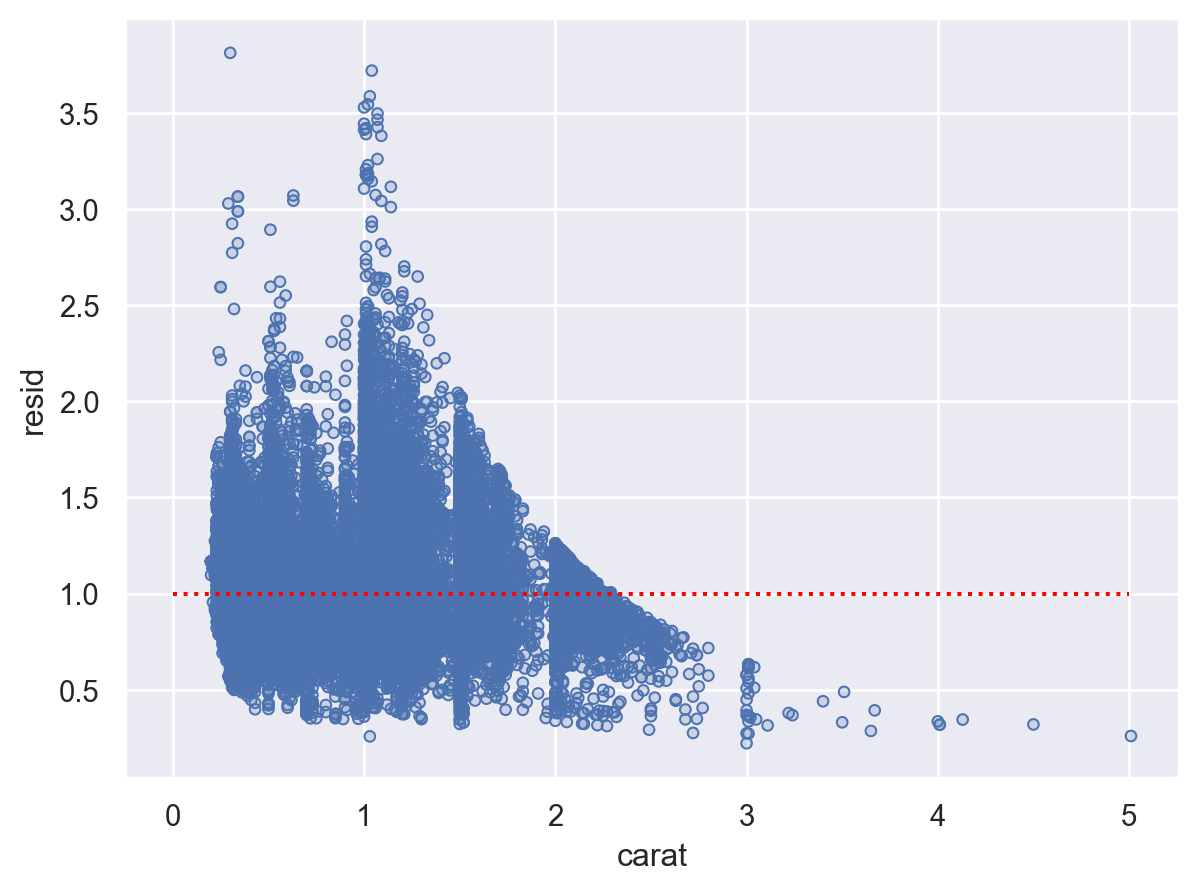

In [345]:
#| echo: false
hline = pd.DataFrame({"x": [0, 5], "y": [1, 1]})
(
    so.Plot(diamonds2, x='carat', y='resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), x=hline.x, y=hline.y)
)

::: {.callout-note collapse=true}
#### Code

```python
hline = pd.DataFrame({"x": [-1.5, 1.5], "y": [0, 0]})
(
    so.Plot(diamonds2, x='log_carat', y='log_resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), x=hline.x, y=hline.y)
)
```
:::

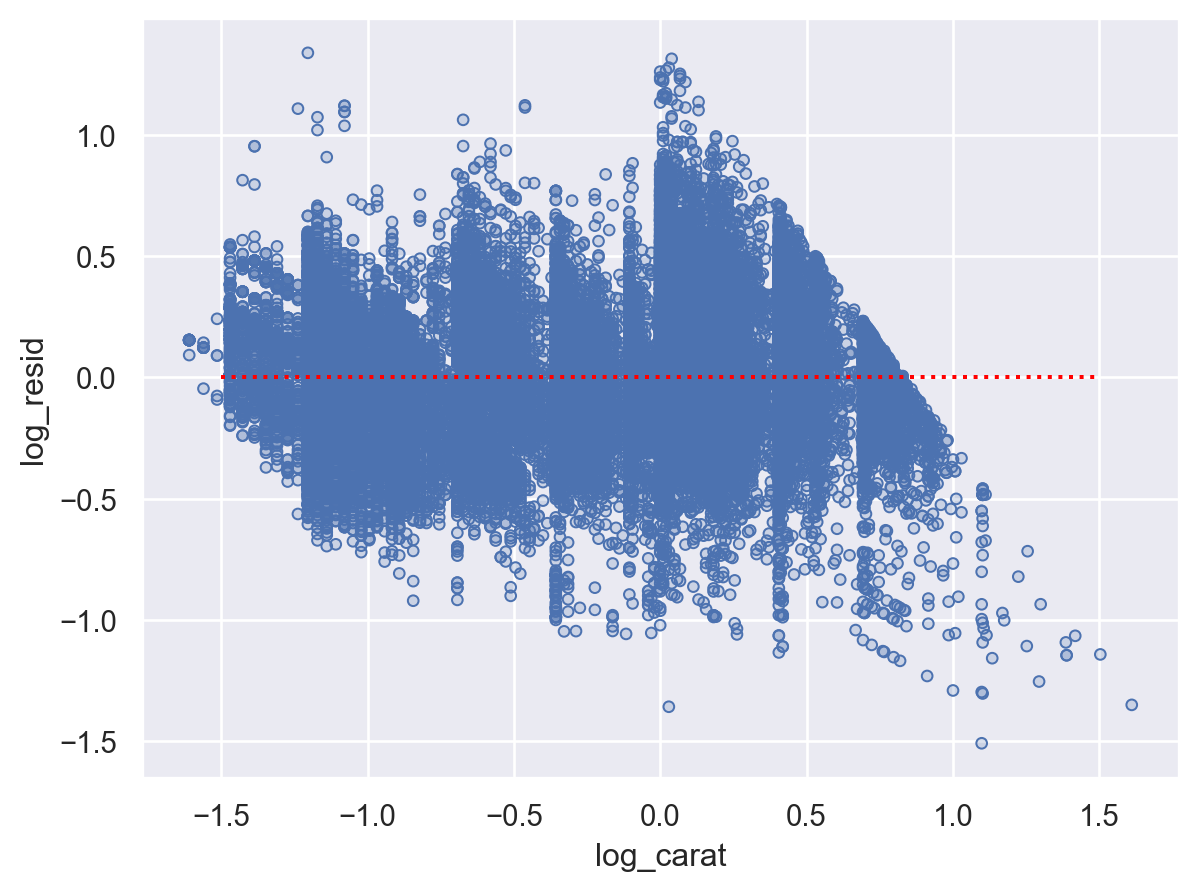

In [348]:
#| echo: false
hline = pd.DataFrame({"x": [-1.5, 1.5], "y": [0, 0]})
(
    so.Plot(diamonds2, x='log_carat', y='log_resid')
    .add(so.Dots())
    .add(so.Line(linestyle=":", color="red"), x=hline.x, y=hline.y)
)

캐럿(`carat`)으로 설명되지 않는 가격의 variation들로만 추가 분석을 실시하면,  
즉, `cut`이 이 설명되지 못하는 부분을 얼마나 추가로 설명할 수 있는가?

::: {.callout-note collapse=true}
#### Code
```python
hline = pd.DataFrame({"x": diamonds2["cut"].value_counts().index.array, "y": [1, 1, 1, 1, 1]})
(
    so.Plot(diamonds2, x='cut', y='resid')
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)))
    .add(so.Dot(marker="<", pointsize=8), so.Agg("median"))
    .add(so.Line(linestyle=":", color="red"), x=hline.x, y=hline.y)
)
```
:::

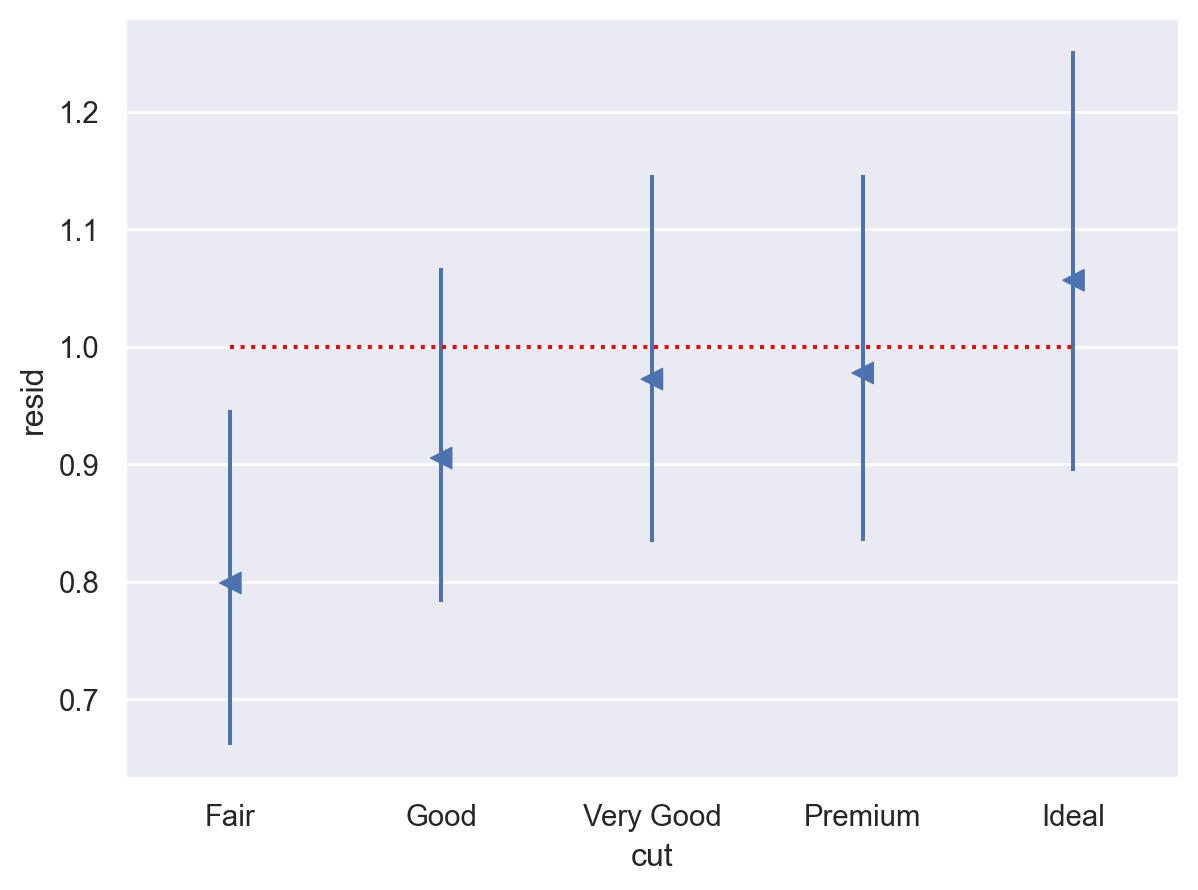

In [410]:
#| echo: false
hline = pd.DataFrame({"x": diamonds2["cut"].value_counts().index.array, "y": [1, 1, 1, 1, 1]})
(
    so.Plot(diamonds2, x='cut', y='resid')
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)))
    .add(so.Dot(marker="<", pointsize=8), so.Agg("median"))
    .add(so.Line(linestyle=":", color="red"), x=hline.x, y=hline.y)
)

- 다이아몬드의 무게로 가격을 설명한 후 남은 variation를 cut이 얼마나 잘 예측하는가?
- 다이아몬드의 무게로 설명되지 않는 가격의 variation를 cut이 얼마나 잘 예측하는가?
- 다이아몬드의 무게가 가격에 미친 영향을 제거한 후, 혹은 그 영향을 넘어서서 (above and beyond) 컷이 어떻게 가격을 예측하는가?
- 무게(carat)가 동일하다면, 즉 크기가 고정된다면 (hold it constant), 무게의 영향이 제거된 퀄리티에 따른 가격에 대한 관계가 나타날 것임

#| code-summary: 
::: {.callout-note collapse=true}

```python
diamonds2["carat_cat"] = pd.qcut(diamonds2["carat"], 12)
(
    so.Plot(diamonds2, x='cut', y='price')
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)))
    .add(so.Dot(marker="<", pointsize=5), so.Agg("median"))
    .facet("carat_cat", wrap=3)
    .share(y=False)
    .layout(size=(10, 8))
)
```
:::

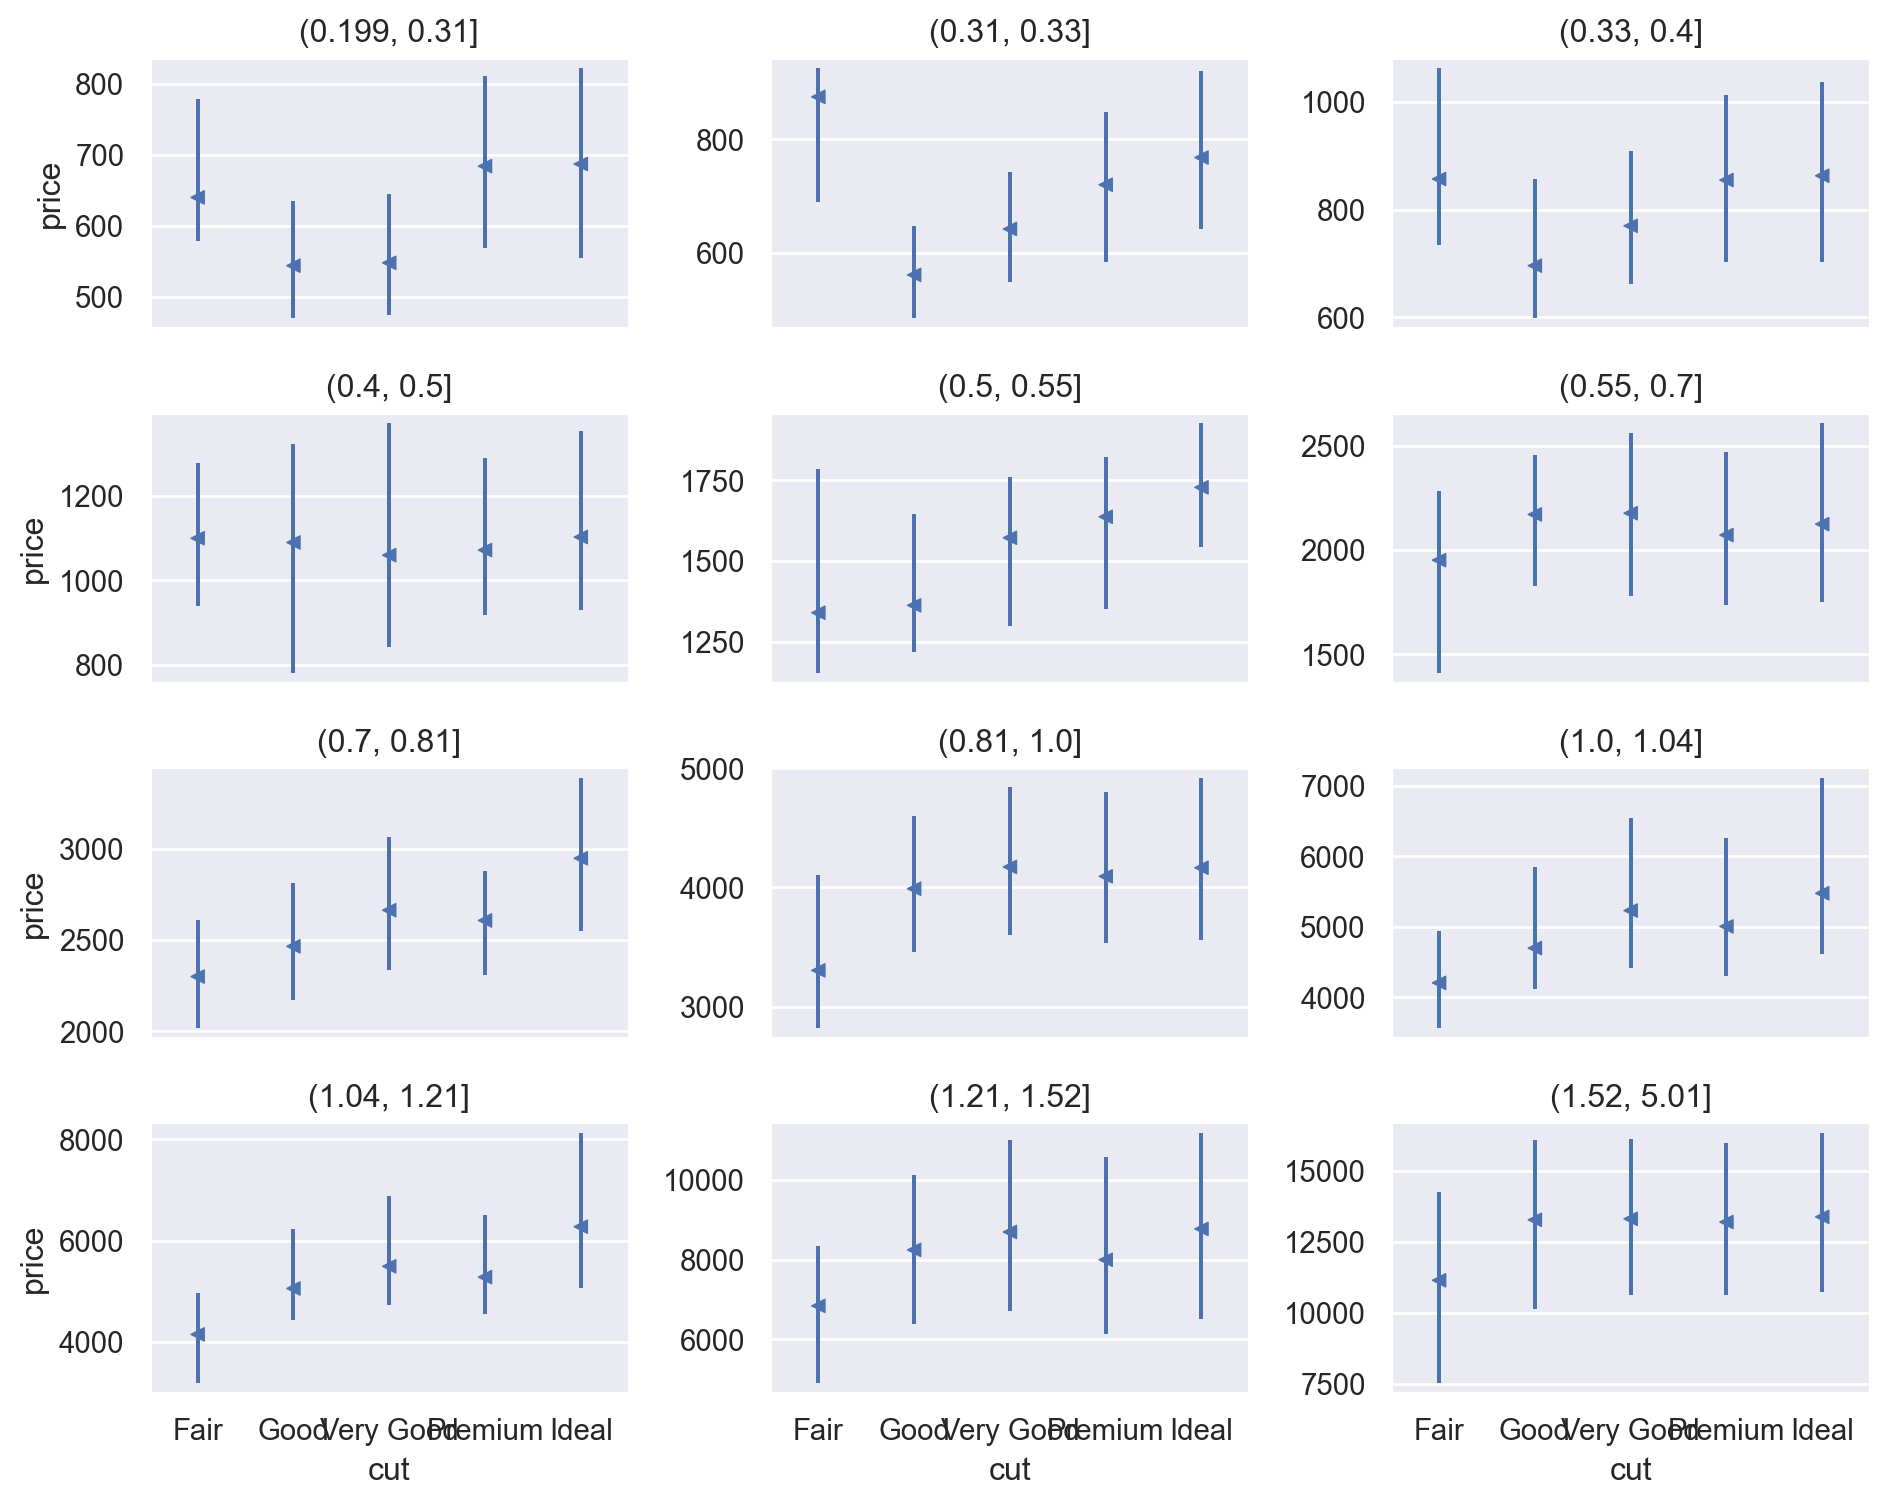

In [381]:
#| echo: false
diamonds2["carat_cat"] = pd.qcut(diamonds2["carat"], 12)
(
    so.Plot(diamonds2, x='cut', y='price')
    .add(so.Range(), so.Est("median", errorbar=("pi", 50)))
    .add(so.Dot(marker="<", pointsize=5), so.Agg("median"))
    .facet("carat_cat", wrap=3)
    .share(y=False)
    .layout(size=(10, 8))
)

# 과제
Data on houses in Saratoga County, New York, USA in 2006

더 큰 데이터셋은 다음을 참고: [The Ames Housing dataset in Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

In [382]:
houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")

houses = houses_data.data # data
# print(houses_data.__doc__) # documents

houses

       price  lotSize  age  landValue  livingArea  pctCollege  bedrooms  \
0     132500     0.09   42      50000         906          35         2   
1     181115     0.92    0      22300        1953          51         3   
2     109000     0.19  133       7300        1944          51         4   
...      ...      ...  ...        ...         ...         ...       ...   
1725  194900     0.39    9      20400        1099          51         2   
1726  125000     0.24   48      16800        1225          51         3   
1727  111300     0.59   86      26000        1959          51         3   

      fireplaces  bathrooms  rooms          heating      fuel  \
0              1       1.00      5         electric  electric   
1              0       2.50      6  hot water/steam       gas   
2              1       1.00      8  hot water/steam       gas   
...          ...        ...    ...              ...       ...   
1725           0       1.00      3          hot air       gas   
1726     

위 데이터를 이용하여, 이 단원에서 다룬 탐색적 분석을 연습

- 집 값을 예측하는 변수들 중 관심있는 변수들을 선택하면서
- 질문과 함께 분석을 실시, 예를 들어
    - Variation: Categorical variables
        - 어떤 종류의 연료를 사용하며 그 분포는 어떠한가?            
    - Covariation: A categorical and continuous variable
        - 어떤 연료를 사용하는지가 집 값을 결정하는데 어떻게 관계를 맺는가?
    - Covariation: Two continuous variables
        - 집 값에 가장 크게 영향을 주는 요소는? `livingArea`??
    - 다음 코드를 이용하여, `living area`가 설명하지 못하는 `price`의 variation (`resid`)를 다른 변수들이 얼마나 예측가능한지 살펴보세요. 예를 들어,
    
        ```python
        import statsmodels.formula.api as smf

        houses_fit = smf.ols('price ~ livingArea', data = houses).fit()
        houses = houses.assign(
            pred = houses_fit.predict(),
            resid = lambda x: x.price - x.pred
        )
        ```

::: {.callout-tip collapse=true}
#### Custom Boxplot
```python
def boxplot(df, x, y, color=None, alpha=0.1):
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".8"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )
```
:::


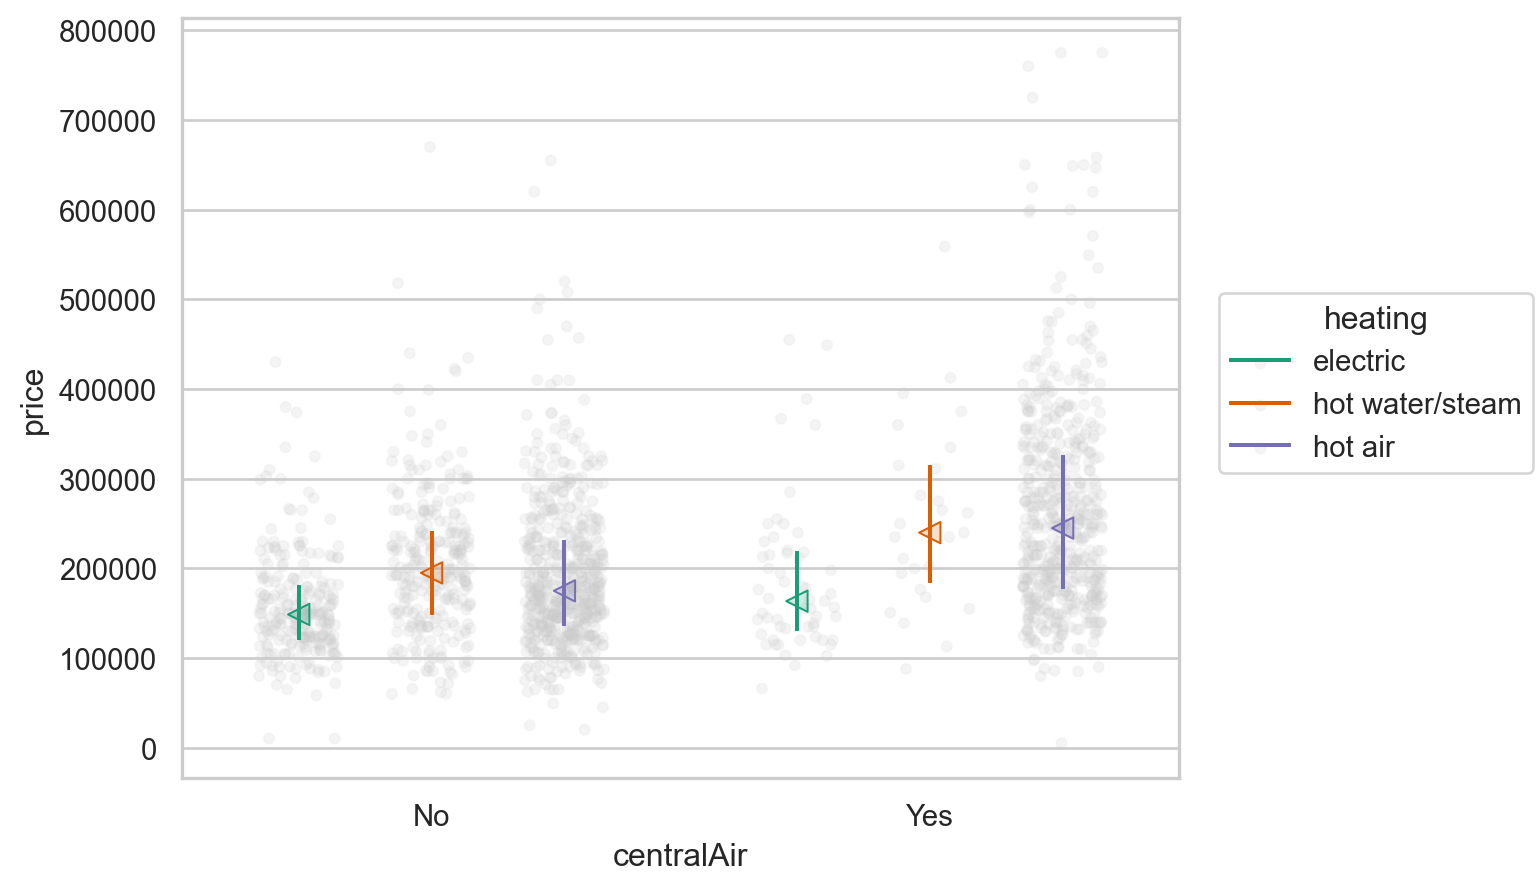

In [439]:
boxplot(houses, x="centralAir", y="price", color="heating")

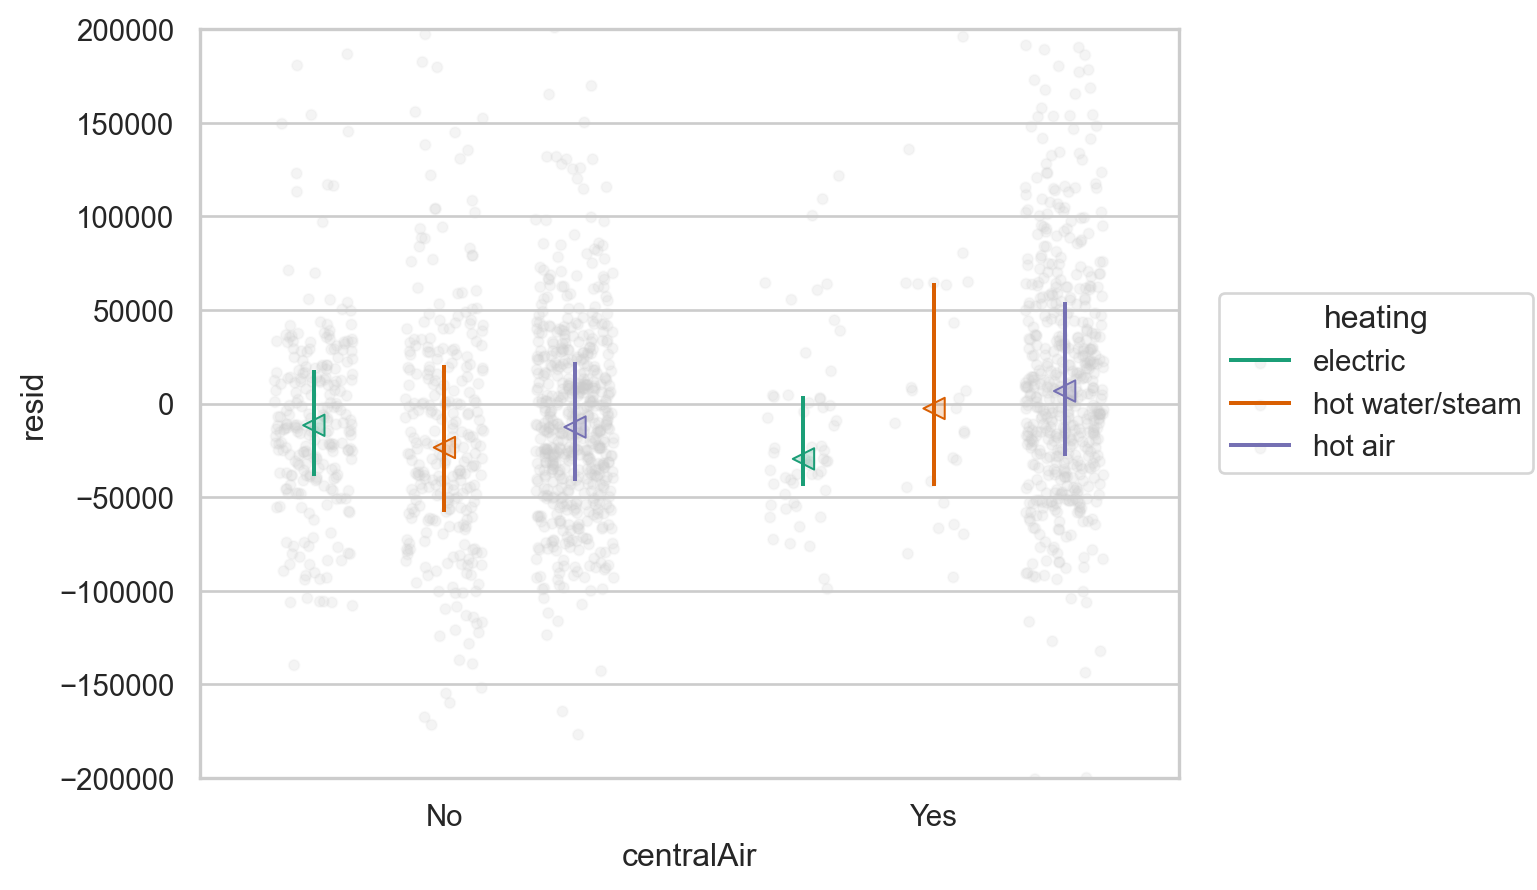

In [440]:
boxplot(houses, x="centralAir", y="resid", color="heating").limit(y=(-200000, 200000))